# Тренировка

In [1]:
import pandas as pd
import numpy 
import datetime 
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import random
import math
import time


In [2]:
time_start=time.time()

**Загружаем последние созданные результаты тренировки и базы данных, которые будем использовать.**

In [3]:
diary=pd.read_excel (r'C:/Users/Natalya/Desktop/Учёба/diary.xlsx')
data=pd.read_excel('C:/Users/Natalya/Desktop/ноябрь 2024/Ноябрь МСК.xlsx')
data_dates=pd.read_csv('C:/Users/Natalya/Desktop/Учёба/Отчёт с датами.csv',delimiter=';')

In [4]:
def type_of_task(type):
    diary[diary['раздел']==type].pivot_table(index=['дата','раздел'],columns='решила?',values='задание',aggfunc='count',fill_value=0).plot.bar(figsize=(15,5))

In [24]:
def percent_ok(type):
    diary2=diary[diary['раздел']==type].pivot_table(index=['Номер недели','раздел'],columns='решила?',values='задание',aggfunc='count',fill_value=0)
    diary2.reset_index(inplace= True )
    diary2['Процент правильных ответов']=round(diary2['да']/(diary2['да']+diary2['нет'])*100)
    plt.figure(figsize=(15, 5))
    plt.bar(diary2['Номер недели'],diary2['Процент правильных ответов'])
    plt.axhline(y=100, color='red')
    plt.title('% Правильных ответов по неделе')
    plt.xlabel('Неделя')
    plt.ylabel('% Правильных ответов')
    plt.xticks(numpy.arange(min(diary2['Номер недели']), max(diary2['Номер недели'])+1, 1.0))
    plt.show()

### Задания на тему Перевод и Определения

In [25]:
dictionary={'Retention': 'ретейшен - удержание',
            'height': 'хайт - рост',
            'Weight': 'вейт - вес',
            'CAC, или Customer Acquisition Cost': 'Кастумер аквизишен кост - Стоимость привлечения клиента ',
            'Acquisition': 'аквизишен - Приобретение ',
             'cost': 'кост - стоимость',
            'ARPU, или Average Revenue Per User': 'Средний Доход на Одного Пользователя',
             'Average': 'эвридж - средний ',
             'Revenue': 'ревенью - доход',
             'Per User': 'Пё юзер - На каждого пользователя',
             'query': 'Квери - запрос',
             'Unit': 'Юнет - Единица измерения',
             'User Experience Research': 'UX исследования – изучение потребительского поведения' ,
             'Experience': 'Экспириенс - Опыт',
             'Research': 'Рисач - Исследование',
             'Reach': 'рич - Охват, достижения',
             'rich': 'рич - богатый',
             'Impact': 'импект - влияние',
             'Confidence': 'конфедентс - уверенность',
             'Efforts': 'эфёртс - усилие',
             'insert': 'инсерт - Вставить ',
             'Warehouse': 'Верехауз - Склад',
             'Event': 'Ивент  - событие',
             'comprehensions': 'косперхейшенс - понимания',
             'apply': 'эплай - применить',
             'unterminated ': 'антерминейтед - незавершенный',
             'detected': 'детектид - обнаружен',
             'common table expressions': 'общие табличные выражения',
             'common': 'камон - общие',
             'expressions': 'Экспрешенс  - выражения',
             'Score':'Скор, Счёт, оценка',
             'Dimension':'измерение',
             'ad-hoc':'эд хок Ad hoc (дословно — к этому) — латинская фраза, означающая «для данного случая», ',
             'KPI':'(Key Performance Indicators) — это ключевые показатели эффективности или деятельности',
             'Indicators':'Индикейтос, показатель',
             'Performance':'Производительность, а также представление',
             'members':'мемберс, элементы, члены',
             'edit':'эдит, редактировать',
             'CURRENT':'карент текущий','describe':'описывать',
             'e-commerce':'E-commerce (электронная коммерция) — это сфера деятельности, связанная с покупкой и продажей товаров и услуг в интернете',
             'ERP-система Enterprise Resource Planning':'Планирование ресурсов предприятия (Enterprise-предприятие,Resource-ресурс, Planning-Планирование)'}

concepts={'База данных' :'База данных — это набор данных, хранящихся в структурированном виде',
         'Система управления базами данных(СУБД)': 'Система управления базами данных(СУБД) — это совокупность языковых и программных средст,которая осуществляет доступ к данным, позволяет их создавать,менять и удалять, обеспечивает безопасность данных и т.д.PostgreSQL , Clickhouse, MySQL',
          'Реляционные БД':'Реляционными называются базы данных, в основе построения которых лежит реляционная модель. В такой базе данные структурированы в виде таблиц, которые содержат строки и столбцы.',
          'Нереляционная БД':'Нереляционная база данных (NoSQL) — это база данных, в которой в отличие от большинства традиционных систем баз данных не используется табличная схема строк и столбцов. В этих базах данных применяется модель хранения, оптимизированная под конкретные требования типа хранимых данных. Например, данные могут храниться как простые пары "ключ — значение"',
          'Порядок ВЫПОЛНЕНИЯ запроса':'- Порядок выполнения запроса:1.	FROM 2.	JOIN 3.WHERE 4.	GROUP BY 5.HAVING 6.SELECT 7.DISTINCT 8.UNION 9.ORDER BY 10.LIMIT и OFFSET',
          'Порядок НАПИСАНИЯ запроса':'SELECT, FROM, JOIN, WHERE, GROUP BY,ORDER BY,LIMIT/OFFSET',
          'Виды джойнов':'INNER JOIN – совпадающим значениям в столбцы, по которому связываем LEFT OUTER JOIN – когда остаются все значения из левой таблицы и прибавляются из правой по совпадающим значениям RIGHT OUTER JOIN – когда остаются все значения из правой таблицы и прибавляются из левой  по совпадающим значениямFULL OUTER JOIN – когда остаются все значения из обеих таблиц',
          'Первичный ключ':'Первичный ключ (PK) — это уникальный идентификатор каждой записи, которое не может быть NULL',
          'Подзапрос':'Подзапрос SQL - это запрос, который включается в другой запрос. Подзапрос может быть в FROM, тогда его нужно указать в скобках и добавить псевдоним as…, либо может быть после WHERE Подзапросы указывают после ключевого слова WITH  называют общие табличные выражения, или CTE (от англ. common table expressions',
          'DWH (Data Warehouse или по русски Хранилище данных)':'DWH (Data Warehouse или по русски Хранилище данных) - это специализированная система для хранения и управления большими объемами данных, которые объединяются из разных источников с целью анализа и построения отчетов',
          'Основные статистики': 'Основные статистики Мода, Медиана, среднее арифметическое',
          'Основные библиотеки':'Основные библиотеки Pandas (Уэс МакКинни) книга Python и анализ данных, Numpy, Matplotlib, Scipy (сайпай) , seaborn',
          'Метрики DAU, WAU, MAU':'Метрики DAU (Daily Active Users) — это количество уникальных пользователей за сутки. WAU (Weekly Active Users) — это количество пользователей за неделю. MAU (Monthly Active Users) — это кол-во уникальных пользователей за месяц',
          'Конверсия':'Кол-во пользователей совершивших целевое действие/ общее количество пользователей *100 Например Кол-во пользователей совершивших покупку/ пользователей всего *100',
          'Conversion Rate':'Конверсия (Conversion Rate)(конвершен рейт коэффициент конверсии): процент посетителей, которые совершили покупку. Высокий уровень конверсии свидетельствует о том, что сайт или магазин успешно привлекает и удерживает клиентов.',
          'Уровень удержания клиентов (Customer Retention Rate':'Уровень удержания клиентов (Customer Retention Rate): процент клиентов, которые повторно совершают покупки. Высокий уровень удержания клиентов говорит о том, что бизнес успешно строит долгосрочные отношения с клиентами.Retention Rate =количество активных пользователей на текущий день/ количество активных пользователей на первый день)',
          'Churn Rate':'Метрика, обратная Retention Rate, называется Churn Rate(чайн рейт уровень оттока). Она показывает, какой процент пользователей прекращает использовать сервис с течением времени. Churn Rate =1-(количество активных пользователей на n день / количество активных пользователей на (n -1)день)',
          'ROI (Return on Investment':'ROI (Return on Investment)= (Выручка – Затраты на привлечение)/ Затраты на привлечение',
          'ARPU' :'ARPU средняя выручка на одного пользователя= Выручка/Количество Пользователей ',
          'ARPPU':'ARPPU средняя выручка на одного платящего пользователя = Выручка/Количество платящего Пользователей',
          'Лайфтайм':'Лайфтайм — время от момента регистрации пользователя продукта до момента наступления какого-то важного с точки зрения бизнеса события. Например, до очередного входа в систему, создания учётной записи пользователя или — чаще всего — до совершения первой или последующих покупок.',
          'Lifetime Value (LTV): ':'общая сумма дохода, которую приносит один клиент за весь период взаимодействия с компанией. Высокий LTV свидетельствует о том, что клиенты остаются с компанией на длительный срок и приносят значительный доход. LTV = Средний чек * Частота покупок * Среднее время жизни клиента',
          'CAC, или Customer Acquisition Cost':'CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг',
          'ROI или Return On Investment':'ROI или Return On Investment, — окупаемость инвестиций.',
          'Юнит-экономика ':'Юнит-экономика показывает, сколько бизнес зарабатывает с одного юнита. Юнит — это то, что приносит доход. Это может быть клиент, сделка, одна продажа продукта или услуги. Другими словами, вы считаете, сколько зарабатываете на одном ученике вашей школы, или на одном проданном велосипеде, или на одном вендинговом аппарате с годовым обслуживанием.',
          'RPV (от англ. revenue per visitor, ':'Средний доход с одного привлечённого пользователя называют аббревиатурой RPV (от англ. revenue per visitor, «доход с посетителя»).',
          'Лендинг ':'Лендинг (от англ. landing page — «посадочная страница») — это одностраничный сайт с краткой информацией о товаре, услуге или мероприятии',
          'Лид':'Лид — это потенциальный клиент, который заинтересовался товаром или услугой и оставил свои контакты',
          'UX исследования (User Experience Research) ':'UX исследования (User Experience Research) — это процесс изучения поведения, потребностей и мотиваций пользователей с целью улучшения их взаимодействия с продуктом или сервисом.',
          'Ключевые объекты СУБД (Таблицы)':'Таблицы Они состоят из строк и столбцов, где каждая строка представляет собой запись, а каждый столбец — атрибут данных. Таблицы позволяют организовать данные в логическую структуру, что упрощает их управление и поиск.Таблицы могут содержать различные типы данных, такие как числовые, строковые, даты и временные метки. Это позволяет хранить разнообразную информацию в одной базе данных.',
          'Ключевые объекты СУБД (Индексы)': 'Индексы используются для ускорения поиска данных в таблицах. Они создаются на основе одного или нескольких столбцов и позволяют быстро находить нужные записи',
          'Ключевые объекты СУБД (Представления)':'Представления (views) — это виртуальные таблицы, которые создаются на основе запросов к одной или нескольким таблицам. Они позволяют упрощать сложные запросы и обеспечивать безопасность данных. Представления могут использоваться для представления данных в удобном для пользователя виде, скрывая сложные детали реализации.Представления также могут использоваться для ограничения доступа к данным. Например, можно создать представление, которое показывает только определенные столбцы таблицы или только записи, соответствующие определенным условиям. Это позволяет ограничить доступ пользователей к конфиденциальной информации.',
          'Ключевые объекты СУБД (Хранимые процедуры)':'Хранимые процедуры — это наборы SQL-команд, которые сохраняются в СУБД и могут выполняться по запросу. Они позволяют автоматизировать часто выполняемые задачи и улучшать производительность. Хранимые процедуры могут включать сложные логические операции и условия, что позволяет выполнять сложные задачи с минимальными усилиями.Хранимые процедуры также могут улучшить безопасность и целостность данных. Например, можно создать хранимую процедуру для выполнения всех операций по обновлению данных, что позволяет централизованно контролировать и проверять все изменения.',
          'Ключевые объекты СУБД (Триггеры)':'Триггеры — это специальные объекты, которые автоматически выполняются при определенных событиях в таблицах, таких как вставка, обновление или удаление данных. Они используются для обеспечения целостности данных и автоматизации задач. ',
          'Корреляция ':'Взаимосвязь двух или нескольких величин называется «корреляция». Определяется с помощью коэффициента корреляции Пирсона. Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1. ',          
          'Коллекции в Python: список, множество, кортеж, словарь':'Списки в Python — это изменяемые последовательности элементов, которые могут содержать элементы различных типов. Списки создаются с помощью квадратных скобок [],Множество (set) в Python — это изменяемый набор уникальных и неупорядоченных элементов {}. Кортежи в Python — это неизменяемые последовательности элементов, которые создаются с помощью круглых скобок () можно обращаться по индексам значения могут повторяться, Словари в Python — это коллекции, которые хранят пары "ключ-значение". Ключи должны быть уникальными и неизменяемыми (например, строки, числа или кортежи), а значения могут быть любого типа.{}',
          'Числа Фибоначчи':'Числа Фибоначчи — это последовательность чисел, которые задаются по определённому правилу. Оно звучит так: каждое следующее число равно сумме двух предыдущих. Первые два числа заданы сразу и равны 0 и 1.Вот как выглядит последовательность Фибоначчи:0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181',
          'интеграл':'интеграл — это площадь фигуры под графиком функции',
          'ad-hoc запрос':'Ad Hoc запрос — единичная SQL-команда, предназначенная для мгновенного извлечения данных. Он представляет собой своеобразный отчёт, создаваемый на заказ: специфический, оперативный и предназначенный для однократного использования.',
          'Лямбда-функция':'Лямбда-функции – это анонимные функции, которые могут включать только одно выражение. Они обычно используются для выполнения простых операций, не требующих полного определения функции с помощью ключевого слова def. Лямбда-функции могут принимать любое количество аргументов, но могут возвращать только одно значение.',
          'АКтуарий':'АКТУАРИЙ – специалист в области актуарных расчётов, экономики и финансов, решающий задачи финансовой безопасности, оценки рисков и разработки математически обоснованных страховых, финансовых, инвестиционных, социальных и пенсионных схем, статистического анализа с целью определения вероятностей страховых событий, заболеваний и смертей, ущербов от стихийных бедствий и катастроф.',
          'ETL':'ETL — это процесс транспортировки данных, при котором информацию из разных мест преобразуют и кладут в новое место. ETL расшифровывается как extract, transform, load, то есть «извлечь, трансформировать, загрузить».',
          'CRM-система':'CRM-система (Customer Relationship Management) — это программа для автоматизации и контроля взаимодействия компании с клиентами. Она хранит и структурирует информацию о заказах и покупателях, помогает оптимизировать маркетинг, повысить продажи и качество обслуживания. 1Простыми словами, это сервис, который собирает данные о клиентах компании и формирует из них профили для дальнейшей работы. 2',
          'Пайплайн':'Пайплайн — это последовательность взаимосвязанных шагов, на каждом из которых выполняется определённая задача, а результаты передаются на следующий шаг',
          'Apache Airflow':'Apache Airflow — это открытое программное обеспечение для создания, выполнения, мониторинга и оркестровки потоков операций по обработке данных. 1Платформа позволяет разработчикам контролировать и мониторить сложные рабочие процессы, выполняемые в локальных и облачных средах. 2',
          'ML':'machine learning - машинное обучение',
          'Data Warehouse, DWH':'Корпоративное хранилище данных (Data Warehouse, DWH) — это предметно-ориентированная база данных, которая консолидирует важную бизнес-информацию и позволяет в автоматическом режиме подготавливать консолидированные отчёты. ',
          'DDL команды':"DDL (Data Definition Language) Язык определения данных- это язык, используемый в SQL для создания, изменения и удаления объектов базы данных. Основные команды DDL включают CREATE, ALTER, и DROP. Они служат для создания новых таблиц, изменения структуры уже существующих таблиц и удаления ненужных объектов ",
          "Система обработки данных OLAP":"OLAP (Online Analytical Processing) - это технология обработки данных, предназначенная для анализа больших объемов информации. Она позволяет анализировать данные из различных углов зрения, строить многомерные модели данных, проводить множественные агрегирования и детализации данных для более глубокого понимания процессов и явлений. OLAP-системы используются в бизнесе для принятия стратегических решений, планирования и анализа. ",
          "Система обработки данных OLTP":"OLTP (Online Transaction Processing) - это метод обработки данных, который используется для выполнения операций с транзакциями в реальном времени. OLTP обычно применяется в базах данных для выполнения операций типа чтения, записи и изменения данных, таких как операции с банковскими счетами, онлайн заказами или бронированием билетов. Этот метод обработки данных предназначен для оперативного доступа к информации и поддержки бизнес-процессов, которые требуют быстрой и надежной обработки данных",
          'Назвать какие метрики знаешь (12 шт)':"DAU, WAU, MAU, Конверсия CR (Conversion Rate),Уровень удержания клиентов CRR(Customer Retention Rate), Churn Rate(чайн рейт уровень оттока),ROI (Return on Investment),ARPU – средняя выручка на одного пользователя,ARPPU - средняя выручка на одного платящего пользователя,Lifetime Value (LTV):,CAC, или Customer Acquisition Cost, — стоимость привлечения одного клиента,ROI или Return On Investment, — окупаемость инвестиций",
          'Витрина данных':'Витрина данных — это простая форма хранилища данных, ориентированная на одно направление деятельности или тему. С витриной данных сотрудники могут быстрее получать доступ к данным и статистическим показателям, потому что не нужно тратить время на поиск по более сложному хранилищу данных или вручную собирать данные из разных источников.',
          'Типы данных в Python ':'Логические (boolean True, False), числа(int,float), строки(string), байты, кортеж(tuple) , список(list), множество(set), словарь(dict). list, set, dict можно изменять.' ,
          'Нормализация данных':'Нормализация данных — это процесс организации данных в базе данных с целью уменьшения избыточности и улучшения целостности данных. Этот процесс включает в себя разделение больших таблиц на более мелкие и установление связей между ними. Нормализация помогает избежать аномалий при добавлении, обновлении и удалении данных. '
         
    }


# 1. Назови перевод

In [7]:
close='нет'
go='да'
while go!=close:
    for i in range(1,11):
        word=random.choice(list(dictionary))
        print(f'задание номер {i}-  назови определение слова {word}')
        input('Нажми проверить')
        print(dictionary[word])
        answer= input('Получилось решить задание?')
        diary.loc[len(diary)]=[date.today(),'перевод',word,answer,date.today().isocalendar().week]

        
    go=input('Решено 10 заданий, продолжить обучение в этом разделе?')
    

задание номер 1-  назови определение слова User Experience Research
Нажми проверить
UX исследования – изучение потребительского поведения
Получилось решить задание?да
задание номер 2-  назови определение слова Per User
Нажми проверить
Пё юзер - На каждого пользователя
Получилось решить задание?да
задание номер 3-  назови определение слова Event
Нажми проверить
Ивент  - событие
Получилось решить задание?да
задание номер 4-  назови определение слова Indicators
Нажми проверить
Индикейтос, показатель
Получилось решить задание?да
задание номер 5-  назови определение слова Weight
Нажми проверить
вейт - вес
Получилось решить задание?да
задание номер 6-  назови определение слова Revenue
Нажми проверить
ревенью - доход
Получилось решить задание?да
задание номер 7-  назови определение слова ARPU, или Average Revenue Per User
Нажми проверить
Средний Доход на Одного Пользователя
Получилось решить задание?да
задание номер 8-  назови определение слова Experience
Нажми проверить
Экспириенс - Опыт
Пол

In [8]:
diary['дата'] = pd.to_datetime(diary['дата']).dt.date

### Результаты

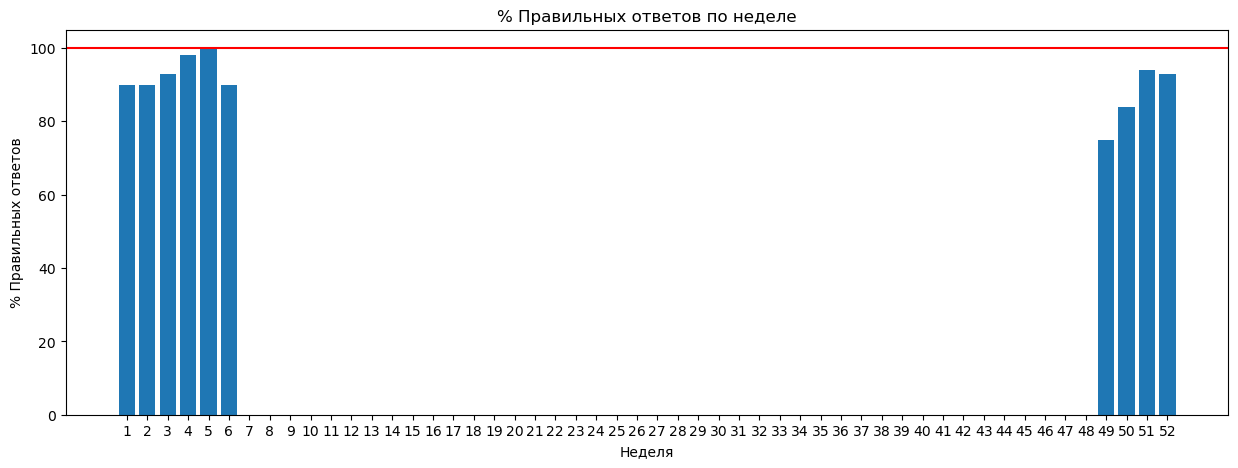

In [26]:
percent_ok('перевод')

# 2. Расскажи определение

In [441]:
close='нет'
go='да'
while go!=close:
    for i in range(1,11):
        concept=random.choice(list(concepts))
        print(f'задание номер {i}-  назови определение слова {concept}')
        input('Нажми проверить')
        print(concepts[concept])
        answer= input('Получилось решить задание?')
        diary.loc[len(diary)]=[date.today(),'определения',concept,answer,date.today().isocalendar().week]

        
    go=input('Решено 10 заданий, продолжить обучение в этом разделе?')
    

задание номер 1-  назови определение слова Подзапрос
Нажми проверить
Подзапрос SQL - это запрос, который включается в другой запрос. Подзапрос может быть в FROM, тогда его нужно указать в скобках и добавить псевдоним as…, либо может быть после WHERE Подзапросы указывают после ключевого слова WITH  называют общие табличные выражения, или CTE (от англ. common table expressions
Получилось решить задание?да
задание номер 2-  назови определение слова Ключевые объекты СУБД (Представления)
Нажми проверить
Представления (views) — это виртуальные таблицы, которые создаются на основе запросов к одной или нескольким таблицам. Они позволяют упрощать сложные запросы и обеспечивать безопасность данных. Представления могут использоваться для представления данных в удобном для пользователя виде, скрывая сложные детали реализации.Представления также могут использоваться для ограничения доступа к данным. Например, можно создать представление, которое показывает только определенные столбцы таблицы или то

### Результаты

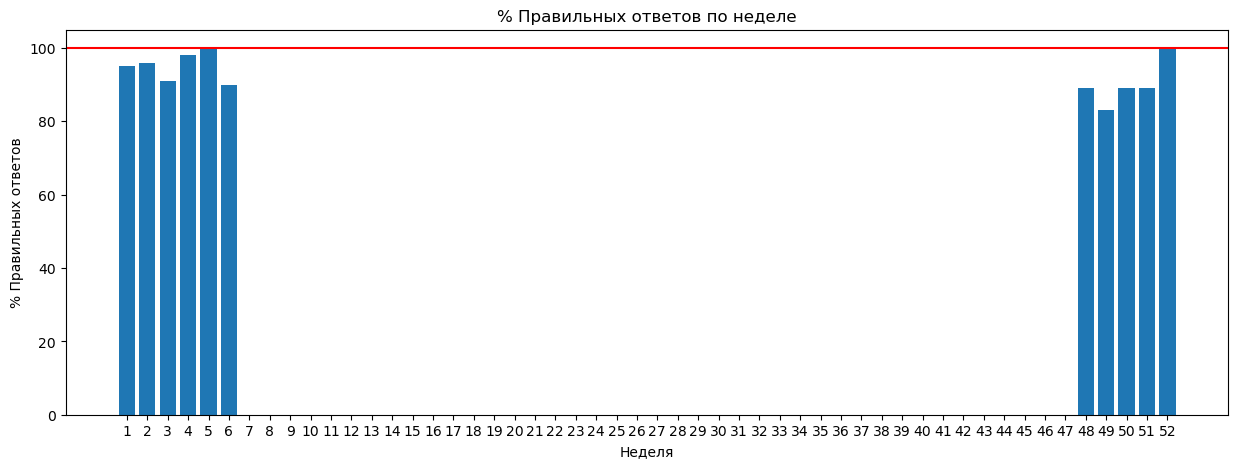

In [29]:
percent_ok('определения')

# 3. Задачи на индексы

In [30]:
counter=2

In [31]:
tasks_slice={'Выведи: профессиональный и люблю работу':'phrase[1::2]',
      'Выведи: аналитик и я':'phrase[2:5]',
      'Выведи тремя способами: люблю свою работу':'phrase[-3:],phrase[5:8],phrase[5:]',
      'Выведи двумя способами: свою':'phrase[-2],phrase[6]',
      'Выведи: люблю работу':'phrase[-3]+" "+phrase[-1]',
       'Выведи: я аналитик я свою':'phrase[::2]',
       'Выведи: работу люблю и профессиональный':'phrase[::-2]',
       'Выведи: работу свою люблю я и аналитик профессиональный я':'phrase[::-1]',
       'Выведи: утобар юовс юлбюл я и китилана йыньланоиссефорп Я':"' '.join(phrase)[::-1]",
      'Вывести из списка от 1 до 20  значения списка с индексами 4 8 12 16':'4:17:4',
        "люблю я и аналитик":'phrase[-3:1:-1]'
      }

phrase=['Я','профессиональный','аналитик','и','я','люблю','свою','работу']

### Реши задачу:

In [482]:
task_slice=random.choice(list(tasks_slice))
task_slice

'Вывести из списка от 1 до 20  значения списка с индексами 4 8 12 16'

### Моё решение:

In [484]:
[x for x in range(1,21)][4:17:4]

[5, 9, 13, 17]

### Проверить решение:

In [41]:
tasks_slice[task_slice]

'4:17:4'

In [42]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'задача на срезы',task_slice,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [43]:
counter=counter-1
print(f'Осталось решить {counter}')


Осталось решить 0


### Результаты

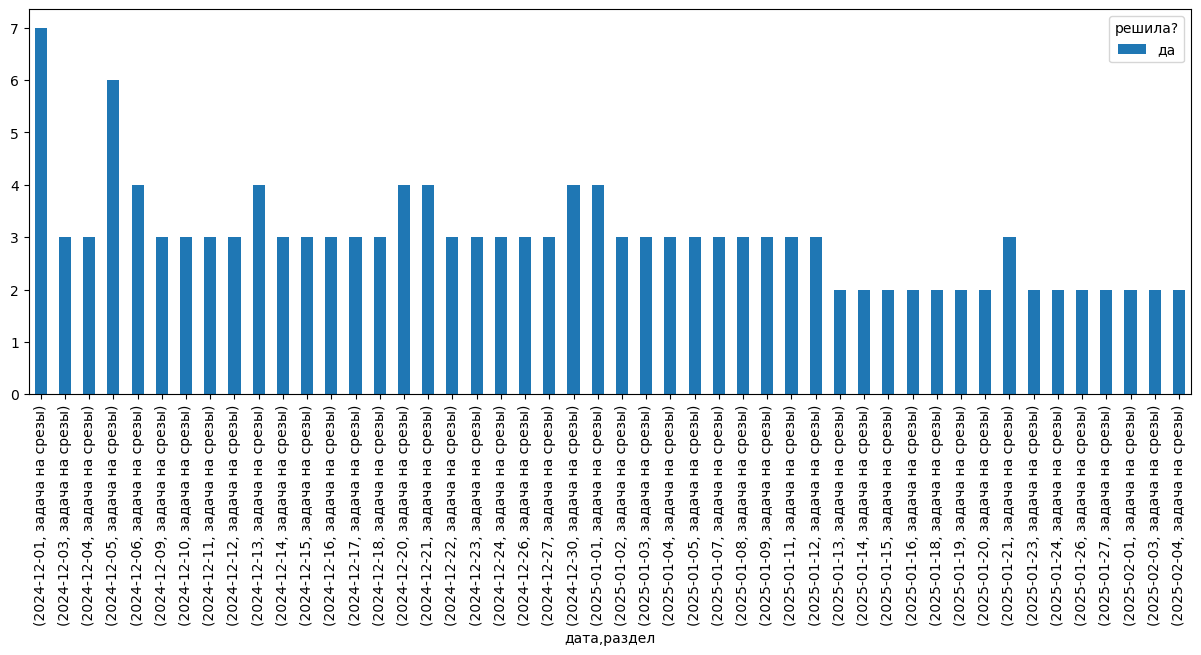

In [44]:
type_of_task('задача на срезы')

# 4. Задачи Python

In [45]:
counter=5

In [46]:
df=pd.DataFrame({'Name':['Natasha','Каte','Olya','Max'],'Age':[32,10,37,32]})
words = ["apple", "bat", "cat", "dog", "dogs"]
my_number='89652244294'
numbers=[4,5,3,2,2,5]
dict1={1:[3,9,0,55,1],
      2:['Маша',0,5,15],
      3:[30,91,0,50,11],
      4:[34,9,0,5,12]}
super_set={4,9,2,1,5}
text='Надо разделить по словам'

tasks__to_create={'Создание списка четных чисел от 0 до 9':'x for x in range(10) if x % 2 == 0',
                 'Создание списка слов длиной больше 3 символов из списка words ':'[word for word in words if len(word) > 3]',
                 'посчитать сумму квадратов списка numbers обычным циклом':'"(a=0\nfor i in numbers:\n   a=a+i**2)"',
                 'посчитать сумму квадратов списка numbers одной строкой':'sum([i**2 for i in numbers ])',
                 'найти сумму квадратов всех значений с словаре dict1':"'z=0\nfor i in dict1.values():\n    for x in i:\n        if type(x)==int:\n            z=z+x**2\nz'",
                 'умножь на 10 каждое число от 1 до 5':'x*10 for x in range(1, 6)',
                 'сделать с большой буквы все слова phrase с помощью map':'list(map(str.upper,phrase))',
                 'вывести слова print("apple", "bat", "cat") с разделителем * ':'print("apple", "bat", "cat", sep="*")',
                 'умножить на 2 каждый элемент numbers с помощью map и lambda':'list(map(lambda x: x*2 , numbers))',
                 'написать функцию def, которая возращает для элементов numbers от хорошо до плохо':"def f(x):\nfor i in x:\nif i==2:\nprint ('плохо')\nelif i==3:\nprint ('удовлетворительно')\nelif i==4:\nprint ('хорошо')\nelif i==5:\nprint ('отлично')",
                 'найти сумму numbers':'sum(numbers)',
                 'найти максимальное numbers':'max(numbers)',
                 'найти минимальное numbers':'min(numbers)',
                 'отсортировать список numbers по возрастанию':'sorted(numbers)',
                 'отсортировать список numbers по убыванию':'sorted(numbers, reverse=True)',
                 'найти факториал 10 двумя способами':'math.factorial(10),"x=1\nfor i in range(1,11):\nx=x*i\nprint(x)"',        
                 'заменить первые 3 цифры и последние 3 цифры my_number на ххх':"a=my_number.replace(my_number[:3], 'xxx')\na=a.replace(a[-3:], 'xxx')\na",
                 'Посмотреть тип данных my_number':'type(my_number)',
                  "найти индекс вхождения слова dog в списке words":"words.index('dog')",
                  "Добавить слово fish в лист words ":"words.append('fish')",
                  "Добавить слова банан и груша в лист words":"words.extend(['банан','груша'])",
                  "добавить слова курица на место индекса 2 в лист words ":"words.insert(2,'курица') или words[2]='курица' ",
                  "удалить слово dogs из списка words":"words.remove('dogs')",
                  'удалить из списка words слово с индексом 0':'words.pop(0) или del words[0]',
                  'удалить из списка срез с 2 по 6':'del words[2:6]',
                  'создать множество set из цифр, пустое множество, множество из листа':'my_set1 = {1, 9, 4}, my_set2 =set(),my_set3 = set([1, 7,9])',
                  'удалить элемент 4 из super_set':'super_set.remove(4)',    
                  'добавить один и несколько элементов в множество super_set':'my_set3.add(55),my_set3.update(["hello",5,33])',   
                  'создай пустой кортеж, кортеж из 5 элементов, вывести с 1 по 3 элемент кортежа':'a=(),a=(6,9,4,0,5),a[:3]',
                  'проранжировать числа от 15 до 25 в обратном порядке с шагом 2':'[i for i in range(25,14,-2)]',
                  'написать цикл по 3 листам':'for x,y,z in (a,b,c):,for x,y,z in zip(a,b,c): , можно двумя способами с разным результатом',
                  'отобразить значение ключа 9 словаря dict1, если нет значения отобразить "нет такого ключа"':"dict1.get(9, 'Нет такого')",
                  'добавить новую строку в словарь dict1': "dict1[5]=['Саша', 9, 0, 11,9]",
                  'добавить две новых строки в словарь dict1':'dict1.update({7:[6,9,0,8,3],8:[6,8,0,8,1]})',
                  'удалить строку из словаря dict1 двумя способами':"del dict1[8], dict1.pop(7)",
                  'отразить все ключи словаря dict1, все значения, и все пары ключ-значения из словаря': 'dict1.keys()),dict1.values()),dict1.items()',
                  'написать цикл с while и continue':'i = 0 while i < 10: if i == 5: break if i % 2 == 0: i += 1 continue print(i) i += 1',
                  'сделать все слова words в верхнем и нижнем регистре':'[i.upper() for i in words],[i.lower() for i in words]',
                  'Разделить фразу text по словам':'text.split()'

                  
                 }  

### Реши задачу:

In [95]:
task=random.choice(list(tasks__to_create))
task

'сделать с большой буквы все слова phrase с помощью map'

### Моё решение:

In [96]:
phrase 

['Я', 'профессиональный', 'аналитик', 'и', 'я', 'люблю', 'свою', 'работу']

In [102]:
list(map(str.upper,phrase))

['Я', 'ПРОФЕССИОНАЛЬНЫЙ', 'АНАЛИТИК', 'И', 'Я', 'ЛЮБЛЮ', 'СВОЮ', 'РАБОТУ']

### Проверить решение:

In [100]:
tasks__to_create[task]

'list(map(str.upper,phrase))'

In [103]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'задачи python',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [104]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

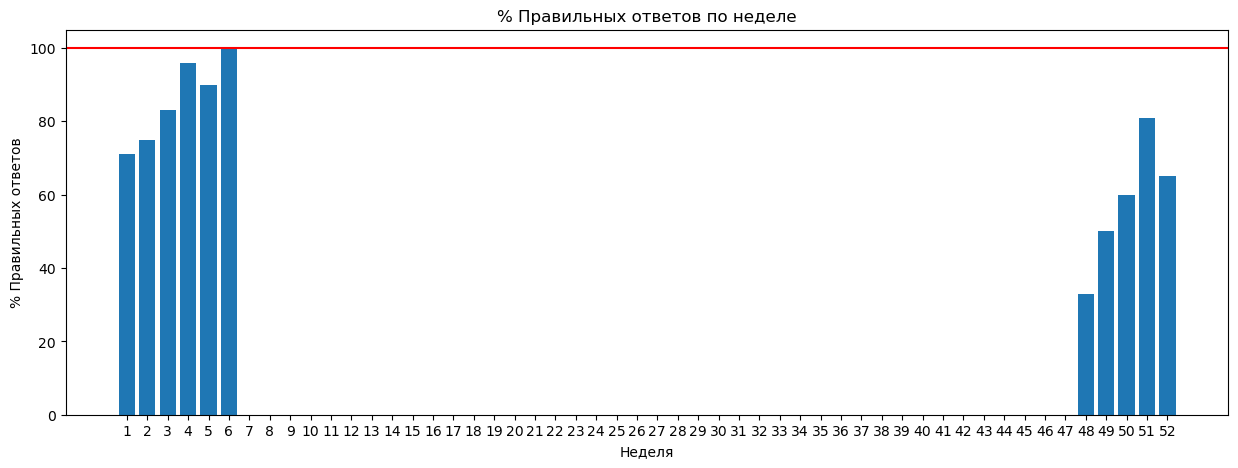

In [105]:
percent_ok('задачи python')

# 5. Работа с Data Frame

In [106]:
counter=5

In [107]:
df=pd.DataFrame({'Name':['Natasha','Каte','Olya','Max'],'Age':[32,10,37,32]})
df2=pd.DataFrame({'Name':['Нина','Света','Олег','Рома'],'Age':[12,1,3,73]})
client=['Снеговская Виктория Юрьевна','Оспанова Дана Бауржановна','Матвеева Альвина Алексеевна']

tasks_df={'создать датафрейм':"pd.DataFrame({'A': ['1', '2', '3'],'B': ['10', '12', '5']}) или pd.DataFrame(data=[['ПЕтя','Вася']],columns=['name', 'last_name'])",
          "составить базу данных из t1=[['мама', 'Наташа'],['папа', 'Максим'],['дочка', 'Катя']],columns=['статус','имя']":"pd.DataFrame(data=t1, columns=['статус','имя','кличка'])",
          "Добавить в df строку 'собака',4":"df.loc[len(df)]=['собака',4]",
          "Добавить новый столбец в df возраст и в нем значение молодой":"df.loc[:,'возраст']='молодой' или df['age']='молодой'",
          "Добавить в df пустой столбец 'hobby'":"df['hobby']=pd.NA",
         "заменить в df имя Max на Maxim":"df.loc[df['Name']=='Max','Name']='Maxim'",
           'одной строкой добавить в df к имени Наташа столбец работа СДЭК':"df.loc[df['Name']=='Natasha','job']='CDEK'",
           "Создать из колонки Name и Age df списки и объединить их":"df['Name'].tolist()+list(df['Age'])",
         'Сменить в data тип данных в столбце Номер заказа':"data['Номер заказа'].astype(int)",
         'Переименовать колонку Вес к оплате':"data.rename(columns={'Вес к оплате, кг':'Вес'},inplace=True)",
         'найти количество дубликатов по номеру накладной':"sum(data['Номер заказа'].duplicated())",
         'удалить дубликаты (номера заказов) data':"data.drop_duplicates(subset=['Номер заказа'],inplace=True)",
         "одну колонку data сделать в верхнем регистре, одну в нижнем":"data['Плательщик'].str.lower(), data['Описание вложения'].str.upper()",
         'сделать срез с 5 по 10 строку из data с и без loc':'data.loc[5:10],data[5:11]',
         'отразить номер заказ с индексом 2':'data.loc[2,"Номер заказа"]',
         "Вывести строки, в которых описание вложения духи":"data[data['Описание вложения']=='духи'] или data.loc[data['Описание вложения']=='духи']",
         "отразить строки где описание вложения духи и первичный приход Москва (Садовод) ":"data.loc[(data['Первичный приход']=='Москва (Садовод)')&(data['Описание вложения']=='духи')]",
         'Посчитать сумму пустых значений по всем столбцам и по одному столбцу':"data['Причина задержки'].isnull().sum()",
         'посчитать количество непустых значений по столбцам':'data.notnull().sum()',
         "Заменить пропущенные значения в столбце Причина задержки на нет инфо":"data['Причина задержки'].fillna('нет инфо', inplace=True)",
         'заменить химическое вещество на химия и лак для ногтей на косметика':"data['Описание вложения'].replace({'химическое вещество':'химия','лак для ногтей':'косметика'},inplace=True)",
         'найти количество уникальных значений Описание вложения':"len(data['Описание вложения'].unique())",
          'найти количество каждого наименования в  Описание вложения':"data['Описание вложения'].value_counts()",
         'отобразить основные числовые характеристики столбца Вес':"data['Вес к оплате, кг'].describe()",
         'Сменить тип данных в Дате заказа на дату':"data_dates['Дата заказа'] = pd.to_datetime(data_dates['Дата заказа'], format='%d.%m.%Y')",
          'выделить время из столбца data_dates, где есть дата и время':"data_dates['Время'] = pd.to_datetime(data_dates['Дата и время первого прихода на склад (в г.отправителе)'], format='%d.%m.%Y %H:%M').dt.time",
          'добавить в data_dates колонку с днем недели':"data_dates['день недели']=pd.to_datetime(data_dates['Дата заказа']).dt.weekday",
          'объединить df и df2 друг на друга':'pd.concat([df,df2])',
          'объединить data, data_dates по столбцу Номер заказа ':"pd.merge(data, data_dates, on='Номер заказа' или data.merge(data_dates, on='Номер заказа'))",
          'Составить сводную data по причинам задержки с количеством накладных по датам':"data.pivot_table(index='Причина задержки',columns='Дата',values='Номер заказа',aggfunc='count')",
          'Составить сводную data по причинам задержки с суммой веса':"data.pivot_table(index='Причина задержки',values='Вес к оплате, кг',aggfunc='sum')",
          "Сгруппировать data по описанию вложения и посчитать сумму веса по убыванию":"data.groupby('Описание вложения')['Вес к оплате, кг'].sum().sort_values(ascending=False)",
                  'Сгруппировать в data по причине задержки и посчитать количество уникальных описаний вложения':"data.groupby('Причина задержки')['Описание вложения'].nunique()",
          'Сгруппировать data по причине задержки и посчитать количество уникальных накладных и сумму веса':"data.groupby('Причина задержки').agg({'Номер заказа':'nunique','Вес к оплате, кг':'sum'})",
          'Посмотреть количество колонок в data':'data.shape или len(data.columns)',
          'С помощью query вывести строки из data,где Плательщик Пузырьков Максим Олегович и вес более 10 кг  ':"data.query('Плательщик=='Пузырьков Максим Олегович' and `Вес к оплате, кг`>10')",
          'Двумя способами вывести строки data, где Плательцие в списке client':"data.query('Плательщик in @client'),data[data['Плательщик'].isin(client)]",
          "Разделить вес на группы с помощью pd.qcut и pd.cut ":"data['Группа веса']=pd.qcut(data['Вес к оплате, кг'],q=5) data['Группа веса2']=pd.cut(data['Вес к оплате, кг'],bins=5)",
          'Просортировать data по уменьшению веса':"data.sort_values(by ='Вес к оплате, кг', ascending=False)",
          'Посчитать сколько строк data в столбце Город получателя содержит подстроку "Новосибирская область"':"data['Город получателя'].str.contains('Новосибирская область').sum()",
          "Посчитать сколько в data['ШК места'] в каждой строке встречается подстрока ITM ":"data['ШК места'].str.count('ITM')",
          'Удалить строки с пропусками в столбце ШК места ':"data.dropna(subset='ШК места',inplace=True)",
          'Вывести строки, где в описании вложения слово подушка':"data[data['Описание вложения'].str.contains('подушка')]"

          
        
         }

### Задача:

In [143]:
task=random.choice(list(tasks_df))
task

'Сгруппировать в data по причине задержки и посчитать количество уникальных описаний вложения'

### Моё решение:

In [144]:
data.head(2)

,Номер заказа,Причина задержки,Описание вложения,Плательщик,Город получателя,Первичный приход,ШК места,"Вес к оплате, кг",Дата,Склад
0,10045135803,Необходимо согласовать возврат.,бензин,"""АЛМИ ПЛЮС""","Калининград, Калининградская область, Россия","Киров, городской округ Киров (ЖД Вокзал)",[ITM]000469565819,0.6,1.11,Мск
1,10045972849,Необходимо согласовать возврат.,бензин,Волков Андрей Евгеньевич,"Екатеринбург, Свердловская область, Россия","Москва (На Минской, 14к1)",[ITM]000470498366,3.8,1.11,Мск


In [149]:
data.groupby('Причина задержки')['Описание вложения'].nunique()

Причина задержки
0                                                                                                                                   8
                                                                                                                                  100
9 класс опасности.                                                                                                                  9
9 класс опасности.                                                                                                                  1
В Мирный наз                                                                                                                        1
Возможна отправка только наземным тарифом.                                                                                          2
Возможна только наземная отправка                                                                                                   1
Возможна только наземная отправка.           

### Проверить решение:

In [148]:
tasks_df[task]

"data.groupby('Причина задержки')['Описание вложения'].nunique()"

In [150]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'работа с df',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [151]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

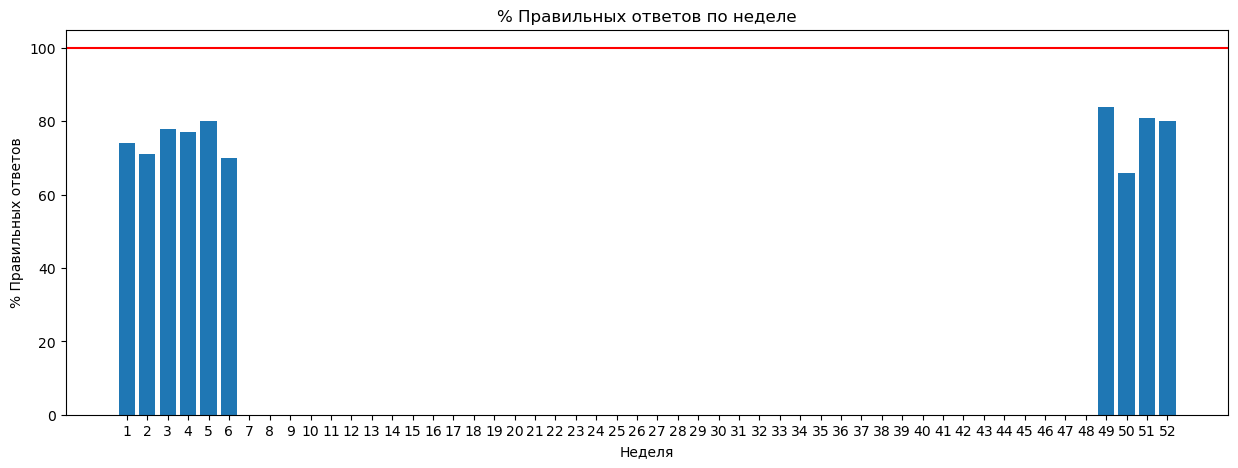

In [152]:
percent_ok('работа с df')

# 6  Визуализация

In [153]:
counter=3

In [154]:
x = [1, 2, 3, 4, 5]
y = [25, 32, 34, 20, 25]
z=['Январь', 'Февраль', 'Март', 'Апрель', 'Май']
tasks_visual={'Вывести столбчатую диаграмму по количеству причин задержки по убыванию':"data['Причина задержки'].value_counts().sort_values(ascending=False).plot.bar()",
             'Вывести горизонтальную столбчатую диаграмму по количеству причин задержки':"data['Причина задержки'].value_counts().sort_values(ascending=True).plot.barh()",
              'Вывести круговую диаграмму по количеству причин задержки':"data['Причина задержки'].value_counts().plot(kind='pie')",
              "Построить гистограмму по весу для по веса менее 30 кг с размером корзины 20":"data[data['Вес к оплате, кг']<30]['Вес к оплате, кг'].hist(bins=20)",
              'Построить диаграмму размаха по весу':"data.boxplot(column='Вес к оплате, кг')",
              'С помощью matplotlib построить график по точкам x y, подписать оси и сам график':"plt.plot(x,y) plt.xlabel('Ось х') plt.ylabel('Ось y') plt.title('Первый график')plt.show()",
              'С помощью matplotlib построить график по точкам x y, красного цвета, с точками "o" 10 размера':"plt.plot(x,y,color='red', marker='o', markersize=10",
              'С помощью matplotlib построить диаграмму рассеивания по точкам x y':'plt.scatter(x, y)',
              'С помощью matplotlib построить столбчатую диаграмму  по точкам z y с легендой Прибыль и названиями осей':"plt.bar(z, y, label='Прибыль') plt.ylabel('рубли')plt.xlabel('месяц') plt.legend()",
              'С помощью matplotlib построить круговую диаграмму  по точкам z y с указанием autopct="%1.1f%%"':"plt.pie(y, labels=z, autopct='%1.1f%%') plt.show()",
               "Построить гистограмму по весу с размером графика длина 15 высота 5":"data['Вес к оплате, кг'].hist(figsize=(15,5))"

}

In [155]:
data.head(2)

,Номер заказа,Причина задержки,Описание вложения,Плательщик,Город получателя,Первичный приход,ШК места,"Вес к оплате, кг",Дата,Склад
0,10045135803,Необходимо согласовать возврат.,бензин,"""АЛМИ ПЛЮС""","Калининград, Калининградская область, Россия","Киров, городской округ Киров (ЖД Вокзал)",[ITM]000469565819,0.6,1.11,Мск
1,10045972849,Необходимо согласовать возврат.,бензин,Волков Андрей Евгеньевич,"Екатеринбург, Свердловская область, Россия","Москва (На Минской, 14к1)",[ITM]000470498366,3.8,1.11,Мск


### Задача:

In [195]:
task=random.choice(list(tasks_visual))
task

'С помощью matplotlib построить график по точкам x y, красного цвета, с точками "o" 10 размера'

### Моё решение:

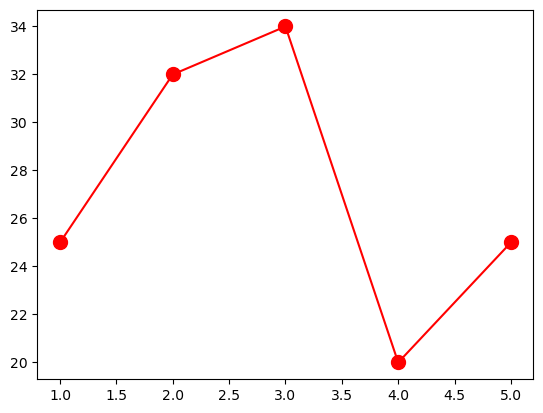

In [198]:
plt.plot(x,y,color='red', marker='o', markersize=10)

### Проверить решение

In [199]:
tasks_visual[task]

"plt.plot(x,y,color='red', marker='o', markersize=10"

In [200]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'работа визуализацией',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [201]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


## Результаты

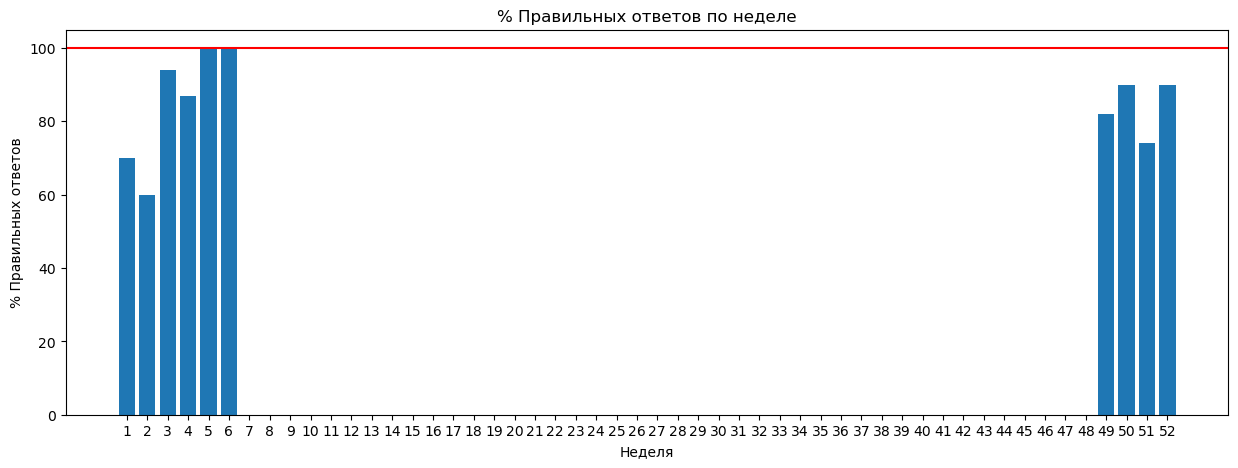

In [202]:
percent_ok('работа визуализацией')

# 7 SQL

In [208]:
import sqlite3

In [209]:
cnn=sqlite3.connect('jupyter_sql_tutorial.db')
%load_ext sql
%sql sqlite:///jupyter_sql_tutorial.db

%%sql  - пишется в начале каждого запроса

In [210]:
counter=10

In [211]:
tasks_sql={
          
           'отразить строки из df_sql, где во вложении духи или встречается слово лак ':"select * from df_sql where [Описание вложения]='магнит' or [Описание вложения] like '%лак%'",
           "Вывести 10 самых непопулярных причин задержки":"select [Причина задержки], count(*) from df_sqlgroup by [Причина задержки]order by count(*) limit 10",
           'Вывести список причин задержки по длине строки по убыванию':"select distinct([Причина задержки]),length([Причина задержки]) from df_sql order by length([Причина задержки]) desc",
           "Вывести накладные где причины задержки 'запрещенный','в рк','ог/зг' ":"select * from df__sql where ([Причина задержки]) in ('запрещенный','в рк','ог/зг')",
           'Вывести из df__sql строки где вес от 15 до 20 кг':"SELECT * FROM df__sql WHERE [Вес к оплате, кг] BETWEEN 15 AND 20",
           'отобразить текущее время':'SELECT CURRENT_TIME',
           'отобразить текущую дату':'SELECT CURRENT_DATE',
           'отобразить текущее время':'SELECT CURRENT_TIME',
           'отобразить текущее время и дату':'SELECT CURRENT_TIMESTAMP',
           'отобразить накладные из df_sql где причина задержки пустая':'SELECT * from df_sql where [Причина задержки] is null',
           'с помощью case разделить вес на 2 группы':"select *, case when [Вес к оплате, кг]<1 then 'Меньше кг' when [Вес к оплате, кг]>=1 then 'Больше кг' END from df__sql",
           'модуль числа -3':'abs(-3)',
           'округляет в меньшую сторону 4.74':'SELECT floor(4.74)',
           'округляет в большую сторону':'SELECT CEILING(2.32)',
           'округляет до ближайшего целого':'SELECT ROUND(8.76)',
           'можно задать сколько цифр после запятой оставить':'SELECT ROUND(21.5595743, 2)',
           'возвести в квадрат':'SELECT POWER(3, 2)',
           'извлечь корень':'SELECT SQRT(ABS(16))',
            'соединить df__sql и df_sql_dates левым джойном':'SELECT count(*) from df__sql as df left join df_sql_dates as dfd on df.[Номер заказа]=dfd.[Номер заказа]',
            'соединить df__sql и df_sql_dates левым джойном':'SELECT * from df__sql as df left join df_sql_dates as dfd on df.[Номер заказа]=dfd.[Номер заказа]',
            'соединить df__sql и df_sql_dates правым джойном':'SELECT count(*) from df__sql as df right join df_sql_dates as dfd on df.[Номер заказа]=dfd.[Номер заказа]',
           'соединить df__sql и df_sql_dates что полностью входили данные из двух таблиц':'SELECT count(*) from df__sql as df full join df_sql_dates as dfd on df.[Номер заказа]=dfd.[Номер заказа]',
           "вывести из df__sql с 4 по 8 строку":'SELECT * from df__sql limit 5 OFFSET 3',
           'вывести все колонки из table_for_sql и заменить тип данных age на текст':'SELECT *, cast(age as text) from table_for_sql',
           'найти в df_sql по колонке вес сумму, среднее, количеств, минимальное и максимальное значение':'select sum([Вес к оплате, кг]),count([Вес к оплате, кг]),avg([Вес к оплате, кг]),min([Вес к оплате, кг]),max([Вес к оплате, кг]) from df_sql',
           'найти в df_sql количество причин задержки и уникальное количество причин задержки':'select count([Причина задержки]),count(distinct[Причина задержки]) from  df_sql',
           'В df_sql сгруппировать данные по причине задержки, узнать количество уникальных описаний вложений и округленную сумму веса':'select [Причина задержки], count(distinct([Описание вложения])),round(sum([Вес к оплате, кг])) from  df_sql group by [Причина задержки]',
           'В df_sql группировать по причине задержки и отразить те, где количество уникальных описаний вложения менее 3':'select [Причина задержки], count(distinct([Описание вложения]))from  df_sql group by [Причина задержки] having count(distinct([Описание вложения]))<3',
            'заменить в df__sql в описании вложения бензин на химию ':"SELECT REPLACE([Описание вложения],'бензин','химия') from df__sql ",
           "Вывести слово в нижнем и в верхнем регистре (jupiter сработает только с английскими словами)":"SELECT UPPER('привет'),LOWER('привет')",
           'Вывести df__sql и добавить столбик, где общее количество накладных':"select *, count('Номер заказа')over() from df__sql ",
           'Вывести df__sql и добавить столбик, где общее указан максимальный вес по наименованиям описания вложения':"select *, max([Вес к оплате, кг])over(partition by [Описание вложения] ) from df__sql ",
           'Проранжировать строки по убыванию веса':"select *, row_number()over(order by[Вес к оплате, кг] desc) from df__sql",
           'Проранжировать строки, сгруппировав по описанию вложения':"select *, row_number()over( partition by [Описание вложения] ) from df__sql",
            'Проранжировать по [Описание вложения] с результатом к примеру 1222557':'select *, rank()over( order by [Описание вложения] ) from df__sql',
           'Проранжировать по [Описание вложения] с результатом к примеру 1222334':'select *, DENSE_RANK()over( order by [Описание вложения] ) from df__sql',
           'С помощью оконной функции добавить колонку с проранжированным весом разделенным на 10 "корзин"':'select *, NTILE(10)over( order by [Вес к оплате, кг] ) from df__sql',
          'Найти сумму веса с накоплением':'select *, sum([Вес к оплате, кг])over( order by [Номер заказа] ) from df__sql',
           'Найти сумму веса с накоплением в разрезе каждого описания вложения':'select *, sum([Вес к оплате, кг])over(partition by [Описание вложения] order by [Номер заказа]) from df__sql',
           'отразить из df_sql_dates Дата и время первого прихода на склад (в г.отправителе) и столбик с предыдущей записью даты и времени':'select [Номер заказа],[Дата и время первого прихода на склад (в г.отправителе)], lag([Дата и время первого прихода на склад (в г.отправителе)])over(order by [Дата и время первого прихода на склад (в г.отправителе)])',
            'отразить из df_sql_dates Дата и время первого прихода на склад (в г.отправителе) и столбик с следущей записью даты и времени':'select [Номер заказа],[Дата и время первого прихода на склад (в г.отправителе)], lead([Дата и время первого прихода на склад (в г.отправителе)])over(order by [Дата и время первого прихода на склад (в г.отправителе)])',
           'отразить из df_sql_dates Дата и время первого прихода на склад (в г.отправителе) и столбик с предыдущей записью даты и времени с шагом 3 и фразой нет инфо вместо None':'select [Номер заказа],[Дата и время первого прихода на склад (в г.отправителе)], lag([Дата и время первого прихода на склад (в г.отправителе)],3)over(order by [Дата и время первого прихода на склад (в г.отправителе)]) from df_sql_dates',
           'Функция в PostgreSQL для отражении разницы между датами':'AGE(Дата1,Дата2)',
           'Вывести из df_sql_dates первый и минимальный номер заказа по каждой дате с помощью оконной функции':"select [Дата заказа],[Номер заказа], FIRST_VALUE([Номер заказа])over(partition by [Дата заказа]), min([Номер заказа])over(partition by [Дата заказа]) from df_sql_dates",
            'Вывести из df_sql_dates первый и последний номер заказа по каждой дате с помощью оконной функции':'select [Дата заказа],[Номер заказа], FIRST_VALUE([Номер заказа])over(partition by [Дата заказа]), LAST_VALUE([Номер заказа])over(partition by [Дата заказа]) from df_sql_dates',
            'Вывести из df_sql_dates второй по счёту номер заказа по каждой дате с помощью оконной функции':'select [Дата заказа],[Номер заказа], NTH_VALUE([Номер заказа],2)over(partition by [Дата заказа] ) from df_sql_dates',
            'Изъять год из даты (в Юпитере не будет работать)':'select [Дата заказа], EXTRACT(YEAR from [Дата заказа]) from df_sql_dates',
            'Усечь дату до месяца и перед этим дату преобразовать в формат timestamp  (в Юпитере не будет работать)':"select [Дата заказа], DATE_TRUNC('month', CAST([Дата заказа] AS timestamp)) from df_sql_dates",
            'Отобрать строки где Первичный приход начинается на Москва и заканчивается на Север)  ':"select *from  df_sql where [Первичный приход] like 'Москва%' and[Первичный приход] like '%Север)'",
            'Вывести дату округленную до месяца, вывести только год из даты':"SELECT  date_trunc('month',date_order)::date,EXTRACT(YEAR  FROM date_order)FROM og",
            'Вывести фразу Текущая дата и дату':"SELECT 'текущая дата: ' || CURRENT_date",
            'Склеить название Причины задержки и Описания вложения через запятую':"SELECT [Причина задержки]||','||[Описание вложения]from df_sql",
            'Заменить в слове Лена букву Л на Г':"SELECT replace('Лена', 'Л', 'Г')",
            "Заменить в описании вложения 'вещество'на 'вещ-во'":"SELECT [Описание вложения],replace([Описание вложения],'вещество','вещ-во') from df_sql",
            " Удалить пропуски в начале и конце слова '    Наташа    '":"SELECT RTRIM('    Наташа    '),LTRIM('    Наташа    '),BTRIM('    Наташа    ')",
            'Прибавить к дате один день и один месяц (в jupyter не будет работать) ':"SELECT [Дата заказа]+interval '1 day',[Дата заказа]+INTERVAL '1 day'+ INTERVAL '1 month'",
            'Функция, чтобы вместо NULL отражался 0':'COALESCE(price, 0)'


           
          
          }



### Задача:

In [470]:
task=random.choice(list(tasks_sql))
task

'Найти сумму веса с накоплением'

### Моё решение:

In [473]:
%%sql 

SELECT *, sum([Вес к оплате, кг])over( order by [Номер заказа] ) as [Вес с накоплением]
from df__sql 
limit 5


 * sqlite:///jupyter_sql_tutorial.db
Done.


index,Номер заказа,Причина задержки,Описание вложения,Плательщик,Город получателя,Первичный приход,ШК места,"Вес к оплате, кг",Дата,Склад,Вес с накоплением
1,2,3,4,5,6,7,8,9.0,10.0,11,9.0
5000,123,нет доков,чернила,Чёрный,Спб,На Янгеля,5,7.0,grgr,Спб,16.0
4178,21692322,9 класс опасности.,духи,Алмазбекова Наргиз Азатовна,"Бишкек, город Бишкек, Киргизия",Ростов-на-Дону (КБ (нет приема/выдачи груза)),[ITM]000479848482,12.0,24.11,Мск,28.0
2030,24563072,Отправка авиа запрещена.,неизвестное вещество,Барри Каллебаут НЛ Раша,"Калининград, Калининградская область, Россия",Чехов (На Садовой),[ITM]000475231767,5.0,13.11,Мск,33.0
2031,24563074,Отправка авиа запрещена.,неизвестное вещество,Барри Каллебаут НЛ Раша,"Калининград, Калининградская область, Россия",Чехов (На Садовой),[ITM]000475231157,2.0,13.11,Мск,35.0


### Проверить решение:

In [471]:
tasks_sql[task]

'select *, sum([Вес к оплате, кг])over( order by [Номер заказа] ) from df__sql'

In [279]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'работа с SQL',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [280]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


## Результаты

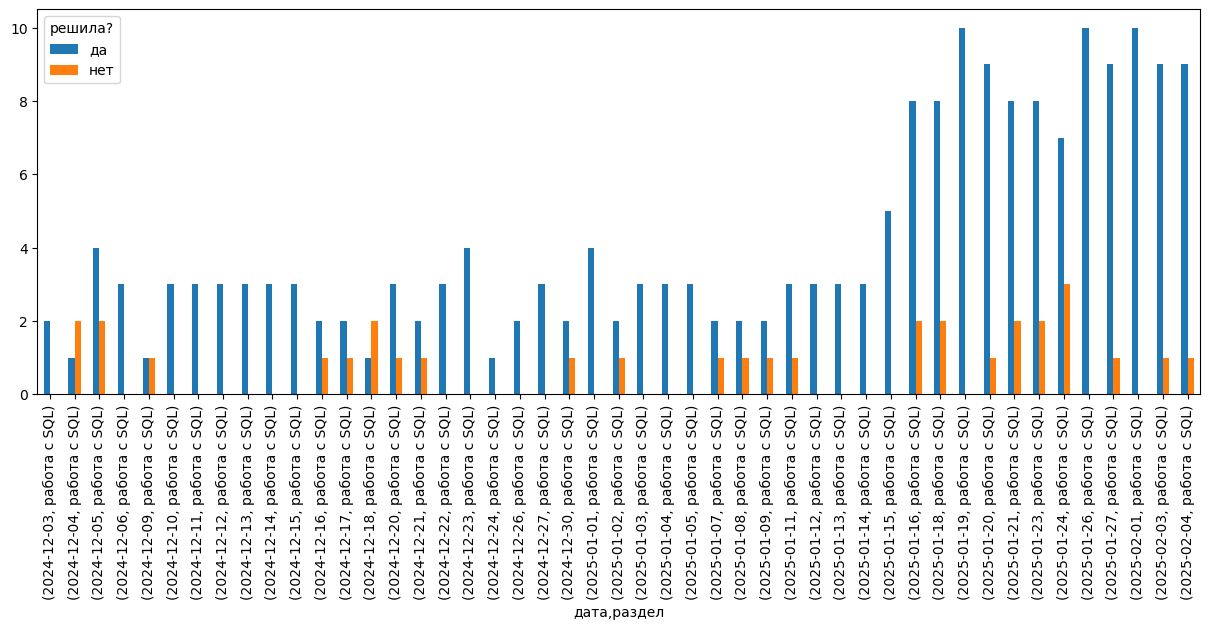

In [281]:
type_of_task('работа с SQL')

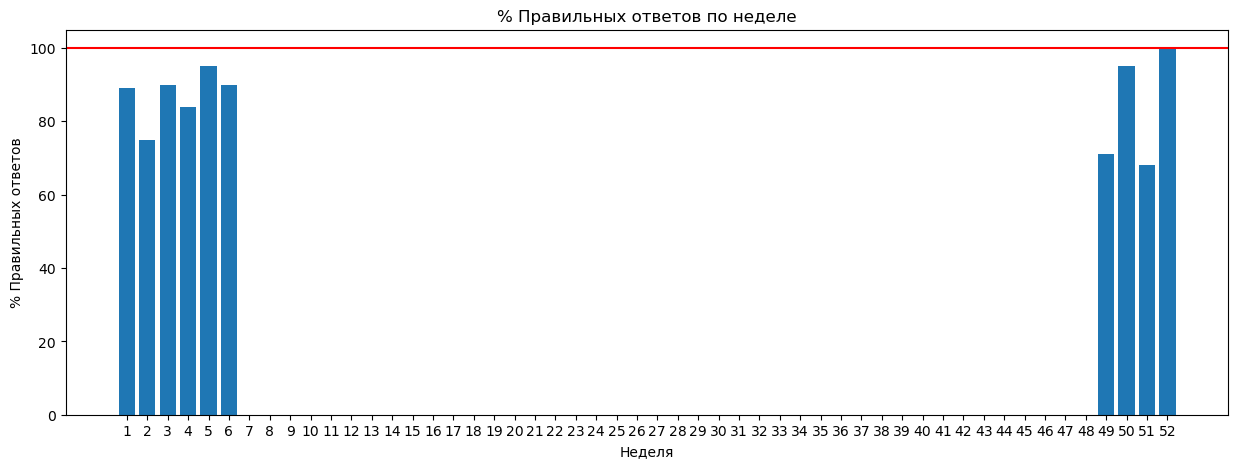

In [282]:
percent_ok('работа с SQL')

# 8 SQL DDL/DML команды

In [283]:
counter=3

In [284]:
language={'Название':['DDL','CREATE TABLE','ALTER TABLE','ALTER TABLE','DROP TABLE','DML','SELECT','INSERT INTO','DELETE','UPDATE'],
           'Перевод':['Язык определения данных','Создать таблицу','Изменить таблицу (Сменить тип данных)','Изменить таблицу (Переименовать столбец)','Удалить таблицу','Язык манипулирования данными','Выбрать','Вставить в','Удалить','Обновить'],
            'Пример':['CREATE TABLE,ALTER TABLE,DROP TABLE','CREATE table friends (friends_id int PRIMARY KEY, date_created date',
                      'ALTER TABLE t1 ALTER COLUMN age TYPE text','ALTER TABLE t1 RENAME title1 TO title2','DROP TABLE my_table','SELECT,INSERT INTO,DELETE,UPDATE','SELECT user_id, username FROM table_name',
                      "INSERT INTO t1 (user_id, name) VALUES(1, 'Ivan')","DELETE FROM t1 WHERE username = 'nick'",
                      "UPDATE t2 SET name = 'new' WHERE id = 1"]
         }




language=pd.DataFrame(data=language)

tasks_ddl={'создать таблицу id первичным ключом, датой в формате дата, имя в формате varchar и возраст и потом удалить таблицу':'CREATE table friends (friends_id int PRIMARY KEY, date_created date, first_name varchar(),  age int)',
          'изменить в таблице table_for_sql в столбце Возраст тип данных':'ALTER TABLE table_for_sql ALTER COLUMN age TYPE text (в джупитер ноутбук код не работает)',
           'Переименовать колонку таблицы table_for_sql':'ALTER TABLE table_for_sql RENAME name to NAME',
           'Создать и удалить таблицу':'CREATE table friendsss (id) DROP table friendsss',
           'Добавить и удалить столбец  в table_for_sql':'ALTER TABLE table_for_sql ADD COLUMN статус VARCHAR  ALTER TABLE table_for_sql DROP COLUMN',
           'Добавить и удалить две строки в table_for_sql':"INSERT INTO table_for_sql (id,NAME,age) VALUES(4,'Джесси',3),(5,'Оля',37)  и DELETE FROM table_for_sql WHERE NAME in ('Джесси','Оля')",
           'Изменить в table_for_sql возраст у Наташи на 33':"UPDATE table_for_sql SET age=33 WHERE NAME='Наташа'"
           
 }


In [285]:
language

,Название,Перевод,Пример
0,DDL,Язык определения данных,"CREATE TABLE,ALTER TABLE,DROP TABLE"
1,CREATE TABLE,Создать таблицу,CREATE table friends (friends_id int PRIMARY K...
2,ALTER TABLE,Изменить таблицу (Сменить тип данных),ALTER TABLE t1 ALTER COLUMN age TYPE text
3,ALTER TABLE,Изменить таблицу (Переименовать столбец),ALTER TABLE t1 RENAME title1 TO title2
4,DROP TABLE,Удалить таблицу,DROP TABLE my_table
5,DML,Язык манипулирования данными,"SELECT,INSERT INTO,DELETE,UPDATE"
6,SELECT,Выбрать,"SELECT user_id, username FROM table_name"
7,INSERT INTO,Вставить в,"INSERT INTO t1 (user_id, name) VALUES(1, 'Ivan')"
8,DELETE,Удалить,DELETE FROM t1 WHERE username = 'nick'
9,UPDATE,Обновить,UPDATE t2 SET name = 'new' WHERE id = 1


### Задача

In [296]:
task=random.choice(list(tasks_ddl))
task

'создать таблицу id первичным ключом, датой в формате дата, имя в формате varchar и возраст и потом удалить таблицу'

### Моё решение

In [297]:
%%sql  

create table new_10(id primary key, data data, name varchar(15), age int)

 * sqlite:///jupyter_sql_tutorial.db
Done.


[]

In [300]:
%%sql  
drop table new_10

 * sqlite:///jupyter_sql_tutorial.db
Done.


[]

### Проверить решение

In [298]:
tasks_ddl[task]

'CREATE table friends (friends_id int PRIMARY KEY, date_created date, first_name varchar(),  age int)'

In [303]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'работа с DDL',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [304]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

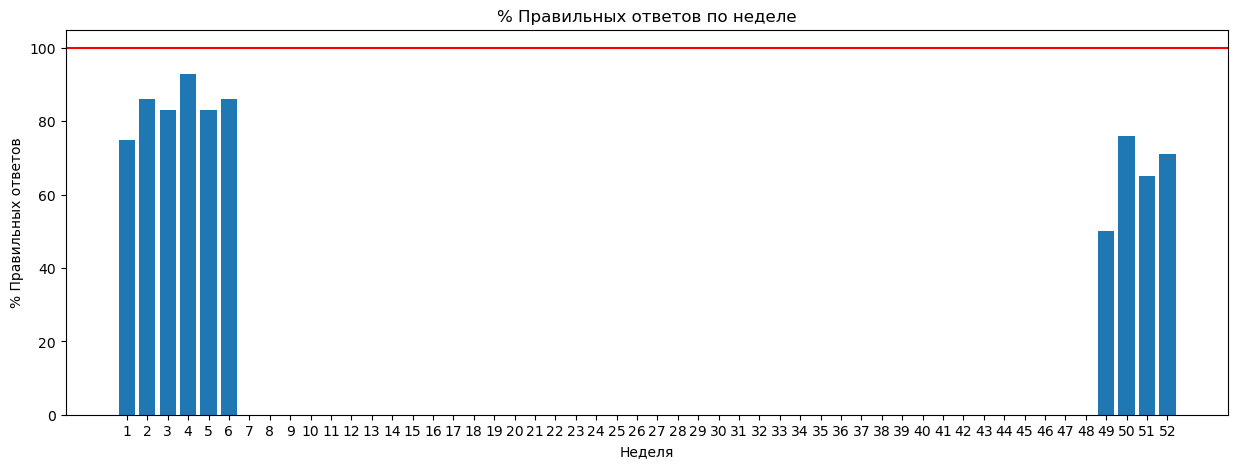

In [305]:
percent_ok('работа с DDL')

# 9 Статистика и теория вероятности

In [306]:
counter=10

In [308]:
visitors=pd.DataFrame({"Сумма покупки за день":[100,150,200,250,350],'Вероятность':[0.4,0.1,0.1,0.2,0.2]})
stat_list=[3,7,1,3,8,4,6,3,6,2,3,7,5,3,5,2,4,9,9,8,6,4,1,3,4,5]
probability=pd.DataFrame({'часы работы':[9,10,11,12,13,14,15,16,17],'Вероятность зайти клиенту':[0.3,0.2,0.1,0.1,0.05,0.05,0.05,0.05,0.01]})

task_stat={'Комбинации. Сколько комбинаций можно составить из  2 пиджака, 4 рубашки, 3 пары штанов и 2 ремня':'Если есть n объектов одного типа и m объектов другого типа, то составить комбинацию из двух объектов разного типа можно n⋅m способами. n и m — это некоторые положительные целые числа.Правило умножения распространяется на любое количество наборов, из которых берётся хотя бы по одному объекту. Представьте, что у вас в гардеробе есть 2 пиджака, 4 рубашки, 3 пары штанов и 2 ремня. Тогда общее количество костюмов, которые можно составить из этих вещей, можно посчитать так: 2⋅4⋅3⋅2=48',
          'Дать определение - Перестановки':'Перестановками называют упорядоченные наборы одних и тех же элементов, которые отличаются только порядком. Например: 𝑎𝑏𝑐 𝑏𝑐𝑎 и 𝑐𝑎𝑏, Pn=n!5! Факториал =1*2*3*4*5=120',
           'Факториал':'Факториал натурального числа n — это произведение всех натуральных чисел от 1 до n, включая само n. 1Обозначается как n! и произносится как «эн факториал». 21 Например, 5! = 5 × 4 × 3 × 2 × 1 = 120.',
          'Размещение,Сколькими способами можно заполнить спортивный пьедестал из трёх мест, если есть 10 претендентов?':'Размещение из n по 𝑘 — это упорядоченный набор из 𝑘 различных элементов, взятых из некоторого множества с мощностью 𝑛, где 𝑘⩽𝑛. То есть некая перестановка 𝑘 выбранных элементов из n.Порядок важен!10! \ (10−3)! = 720',
          'Cочетание В сувенирном магазине продаются 6 видов кружек. Сколько есть способов выбрать 4 разные?':'Cочетание из 𝑛 по 𝑘 — это неупорядоченный набор из 𝑘 различных элементов, взятых из некоторого множества с мощностью n, где 𝑘⩽𝑛. Порядок не важен!6!  / (6−4)!⋅4!=15',
            'Сотрудник компании выбирает два месяца для отпуска. Один отпуск он хочет взять весной, а другой — осенью. Сколько есть возможных комбинаций двух месяцев?':'9',
            'Индекс региона состоит из шести цифр,первая цифра должна быть равна 3,вторая цифра не должна быть равна 0,остальные четыре цифры могут быть любыми,Посчитайте количество всех возможных индексов':'9 * 10**4=90 000',
            'Сколько различных плейлистов из 12 песен с различным порядком можно составить':'факториал 12!=479001600',
            'Размещение - это':' Размещения — это комбинации объектов исходного набора с заданным количеством элементов, которые различаются самими элементами и их расположением (порядок важен)',
            'На чемодане есть кодовый замок из 4 цифр. Цифры в коде не должны повторяться. Порядок цифр важен: Сколько комбинаций кода можно придумать?':'5040',
            'Сколько мелодий из 3 нот можно составить из  7 нот одной октавы? Порядок учитывается:':'210',
            'Игрок участвует в телевизионной викторине. Требуется отгадать слово из 10 букв. Игрок может «открыть» любые 3 буквы. Сколько вариантов выбора у него есть?':'120',
            'Вероятность события A в эксперименте B — это':'— это число от 0 до 1, которое показывает, какую долю исходов событие A составляет от всего вероятностного пространства эксперимента B. Иначе говоря, чтобы найти вероятность события A нужно разделить количество исходов в этом событии на общее число возможных исходов в эксперименте.Вероятность может обозначаться как числом, например, 0 или 0.3, так и процентами, например, 30 %',
            'непрерывные переменные':'Переменные, которые могут принимать любое численное значение, называются непрерывными, например время и вес',
            'дискретны переменные':'Переменные, которые могут принимать только числовые значения из определённого набора значений, называются дискретными. Дискретной величиной могут быть как целые, так и дробные числа, например количество людей и размер обуви',
            'мода, медиана, среднее значение':'Мода — это значение, которое величина принимает наиболее часто.Медиана в статистике — это значение, которое делит упорядоченный ряд данных на две равные части, где половина наблюдений меньше, а другая половина больше этого значения',
            'Найти моду веса в data':"data['Вес к оплате, кг'].mode()",
            'Найти моду листа stat_list':'from statistics import mode  mode(stat_list)',
            'Найти медиану веса в data':"data['Вес к оплате, кг'].median()",
            'Найти медиану stat_list':'import statistics statistics.median(stat_list)',
             'Найти среднее stat_list':'import statistics statistics.mean(stat_list)',
            'Найти среднее веса в data':"data['Вес к оплате, кг'].mean()",
             'Найти дисперсию и стандартное отклонение stat_list без использования библиотек ':'b=0 c=0 for i in stat_list: a=(i-mean)**2 b=b+a c=c+1 b/c (b/c)**0.5',
             'Найти дисперсию и стандартное отклонение stat_list с помощью библиотеки numpy ':'np.std(stat_list) numpy.var(stat_list)',
            'Найти корень из числа с помощью библиотеки numpy':'numpy.sqrt(64)',
          'Найти размах stat_list':'max(stat_list)-min(stat_list)',
          'Найти межквартальный размах stat_list с помощью numpy':'q25,q75=numpy.percentile(stat_list,[25,75]) iqr = q75 - q25',
          "Найти 10 процентель stat_list с помощью numpy":"numpy.percentile(stat_list,10)",
       
          '1, 1, 2, 2, 2, 2, 3, 4, 4, 5 какая вероятность, что выиграет число 2, какая вероятность, что выграет число 5':'вероятность числа 2 =0,4 вероятность числа 5 =0,1 ',
        
          'найти математическое ожидание случайной величины visitors':"sum(visitors['Сумма покупки']*visitors['Вероятность'])",
          'Испытания Бернулли':'Испытания Бернулли – это последовательность независимых испытаний, в каждом из которых возможны только два исхода – «успех» и «неудача».',
          'Биномиальный эксперимент':'Биномиальный эксперимент — это эксперимент, в котором подряд проводят несколько одинаковых и независимых друг от друга испытаний Бернулли.',
          "Питон вырастает добрым с вероятностью  90%, злым 10%. Возьмём двух случайных питонов: Какова вероятность, что один из них будет добрым, а другой — злым?":"0.9*0.1*2=0.18 Умножаем на 2 потому что, здесь подойдут два исхода: «Первый злой, а второй добрый» и «первый добрый, а второй злой». ",
          "Питон вырастает добрым с вероятностью  90%, злым 10%. Возьмём двух случайных питонов: 1) Какова вероятность, что один из них будет добрым, а другой — злым? 2) Что оба будут злые 3) Что оба будут добрыми":"0.9*0.1*2=0.18 Умножаем на 2 потому что, здесь подойдут два исхода: «Первый злой, а второй добрый» и «первый добрый, а второй злой». Вероятность исхода «оба добрые» равна  0.9*2=0.81, «оба злые» равна 0.1*2=0.01",
          "Питон вырастает добрым с вероятностью  90%, злым 10%. Возьмём трёх случайных питонов: какова вероятнось, что  «два питона добрые, а один злой»":'0.9*0.9*0.1*3=0.24',
          'Вероятность, что письмо будет открыто 20%, какая вероятность, что будет открыто 2 письма из 10':'Вероятность двух успехов равна 0.2**2, вероятность восьми неудач равна 0.8**8 количество подходящих исходов равно формуле сочетания 2 из 10 это 10!\((10-2)!*2!).Получим 45*(0.2**2)*(0.8**8) =0.3',
          'Биномиальное распределение':'Биномиальное распределение — это распределение вероятностей числа появлений некоторого события при независимых испытаниях (опытах) в схеме Бернулли, если вероятность. Если вероятность 50% график симметричный, если меньше 50% то график смещается в лево, если больше 50% то смещается вправо',
          'Нормальное распределение — это':'Нормальное распределение — это особый тип распределения, при котором большинство значений сосредоточено около среднего. Его также называют гауссовым распределением',
          'Распределе́ние Пуассо́на':'— распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.Примеры процессов, которые можно описать распределением Пуассона:•Футболисты забивают голы со средней интенсивностью 2.7гола за матч.•В кафе в часы обеда обычно заказывают в среднем 35 порций супа в час.•В течение полярной ночи в заполярном городе северное сияние появляется обычно 3 раза в неделю.•Летом в определённой местности происходят торнадо — в среднем 8.1 торнадо в месяц.',
          'Аппроксимация- это':'Аппроксимация (лат. approximatis — поблизости) — это математический термин для приближения. Аппроксимировать — значит найти значения, близкие к интересующим исследователя.',
          'Корреляция':'Корреляция Взаимосвязь двух или нескольких величин называется «корреляция». Определяется с помощью коэффициента корреляции Пирсона. Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1',
          'Вероятность':'Вероятность события A в эксперименте B— это число от 0 до 1, которое показывает, какую долю исходов событие A составляет от всего вероятностного пространства эксперимента B. Иначе говоря, чтобы найти вероятность события A, нужно разделить количество исходов в этом событии на общее число возможных исходов в эксперименте. Вероятность может обозначаться как числом, например, 0 или 0.3, так и процентами, например, 30 %',
          'Дискретная переменная':'Переменная является дискретной, если она не может принять любое значение. Пример, размер обуви(36 36,5 38), количество проданных машин Переменная, которая может принять любое значение, является непрерывнойПример вес, рост, время',
          'Поправка Бесселя':'Поправка Бесселя используется, когда мы считаем дисперсию не в генеральной совокупности, а в выборке ',
          'Межквартильный размах ':'Межквартильный размах — это размах половины значений набора данных, которые находятся вокруг медианы. Это ближайшие к медиане значения: 25 %меньше неё и 25 % больше.',
          'Процентилем ':'Процентилем некоторого уровня (p-м процентилем) называют значение из набора данных, меньше которого ровно p % элементов всего набора данных.Судя по определению, квартили — это частные случаи процентиля. Поскольку первый квартиль — это значение, левее которого лежит ровно 25 %всего набора данных, то первый квартиль также можно называть 25-м процентилем. Аналогично медиана — это 50-й процентиль, а третий квартиль — это 75-й процентиль.Процентили нужны в случаях, когда нужно найти значение из набора данных, которое отделяет определённую часть всего набора. Например, если нужно найти «возраст сотрудников компании, меньше которого ровно 33 % всех сотрудников». Именно такая универсальность и делает процентиль мощным инструментом в руках любого математика.',
          'экспериментом (испытанием) Бернулли':'Испытание с двумя исходами называют экспериментом (испытанием) Бернулли.',
          'Биномиальный эксперимент':'Биномиальный эксперимент — это эксперимент, в котором подряд проводят несколько одинаковых и независимых друг от друга испытаний Бернулли.',
          'Нормальное распределение ':'Нормальное распределение — это особый тип распределения, при котором большинство значений сосредоточено около среднего. Его также называют гауссовым распределением, законом Гаусса или колоколообразным распределением.  Суть нормального распределения: значения случайной величины будут сгруппированы вокруг среднего значения, и чем дальше от среднего значения, тем меньше вероятность того, что такое значение появится',
          'Распределе́ние Пуассо́на':'— распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.Примеры процессов, которые можно описать распределением Пуассона:•Футболисты забивают голы со средней интенсивностью 2.7гола за матч.•В кафе в часы обеда обычно заказывают в среднем 35 порций супа в час.•В течение полярной ночи в заполярном городе северное сияние появляется обычно 3 раза в неделю.•Летом в определённой местности происходят торнадо — в среднем 8.1 торнадо в месяц.',
          'Репрезентативность':'Репрезентативность — это свойство выборки, которое позволяет ей точно отражать характеристики и особенности генеральной совокупности. Репрезентативная выборка должна быть достаточно большой и разнообразной, чтобы представлять всю генеральную совокупность.',
          'Центральная предельная теорема':'Распространённая формулировка центральной предельной теоремы (сокращённо ЦПТ) звучит так: сумма независимых одинаково распределённых случайных величин стремится к нормальному распределению по мере увеличения их количества.',
          'p-value ':'Помните: p-value — это лишь вероятность получить наблюдаемое или ещё более далёкое от предполагаемого в H0 значения при условии, что H0 верна. Проще говоря, с помощью p-value можно оценить, насколько необычны наши данные, если предположение об истинном значении параметра верно.Если p-value меньше 5%, то нулевая гипотеза отвергается Напомним, что уровень статистической значимости — это вероятность случайно получить в реальном наблюдении значение, далёкое от предполагаемого в нулевой гипотезе.',
          'Распределение Стьюдента':'Распределение Стьюдента (или t-распределение) в теории вероятностей — однопараметрическое семейство абсолютно непрерывных распределений. 1Форма распределения Стьюдента похожа на форму нормального распределения (чем больше число степеней свободы, тем ближе распределение к нормальному). Отличием является то, что «хвосты» распределения Стьюдента медленнее стремятся к нулю, чем «хвосты» нормального распределения',
          "Закон Парето":"Закон Парето (или правило 80/20) — принцип, согласно которому 80% результата дают 20% приложенных усилий, а остальные 80% усилий дают только 20% результата.",

          'Математическое ожидание - это':'Математическое ожидание — понятие в теории вероятностей, означающее среднее (взвешенное по вероятностям возможных значений) значение случайной величины. 1Также математическое ожидание называют ожидаемым значением случайной величины или средним значением случайной величины.',
           'Два жильца зашли в лифт 17-этажного дома на первом этаже. 1) Чему равна вероятность того, что они выйдут на разных этажах? 2) Чему равна вероятность того, что оба жильца выйдут на одном этаже?':'1)15/16,2)1/16',
           'какова вероятность того, что из 5 подброшенных монет хотя бы одна выпадет орлом?':'Общее количество исходов при подбрасывании одной монеты равно 2 (орел или решка). Поэтому вероятность того, что одна монета выпадет решкой равна 1/2.\
                                                                                               Вероятность того, что все 5 монет выпадут решкой - (1/2)**5 = 1/32.Теперь мы можем найти вероятность того, что хотя бы одна монета выпадет орлом:1 - 1/32 = 31/32',
           'Сервис с равной вероятностью размещает  баннер слева ,справа или внутри поисковой выдачи.Чему равна вероятность, что из пяти поисковых запросов хотя бы в одном реклама будет слева от поисковой выдачи?':'1-(2/3)**5=0.868',
           ' Какова вероятность того, что из 3 наугад выбранных зрителей хотя бы один сидит на нечётном месте?':'Найдем вероятность события все сидят на чётных местах и вычтем из него единицу 1-0.5*0.5*0.5=0.875',
           'Три навесных моста соединяют три скалы. На каждой вершине стоит любитель экстремального туризма и решает, в каком направлении двинуться. Известно, что каждый мост выдерживает только одного человека. Если все трое одновременно решат, в каком направлении пойти, то чему будет равна вероятность того, что хотя бы один мост разрушится?':'У каждого героя есть два варианта, куда шагнуть. Получается 2⋅2⋅2=8 исходов.\
                                                                                                исходов когда все остаются живы  всего два: каждый герой идёт на мост слева от себя или на мост справа от себя 1-2/8=3/4',
           'В приюте 24 собаки. Среди собак 9 чёрных псов и 7 белых. Вероятность получить на выгул чёрную собаку равна 9/24 ,белую — 7/24 А какова вероятность выгуливать чёрную или белую собаку?':'9/24 +7/24=2/3',
           'У заводчика щенки белого и кремового окраса, в сумме поровну девочек и мальчиков. Белых щенков 60% от всех,/среди них 55%— девочки. \
            Чему равна вероятность, что прибежит девочка или кремовый щенок любого пола?':'Белых девочек 55% от 60%— в долях это P(C)=0.55⋅0.6=0.33 Кремовых щенков 100%−60%=40%  0.33+0.4=0.73.',
           'Вероятность того, что аккумулятор нового телефона прослужит год и больше, равна 91%,больше двух лет — 75%. Чему равна вероятность того, что аккумулятор проработает от одного года до двух?':'91 -75=16',
           "В ящике носки двух типов:8 белых и 7 с собачками. Макс вытягивает один за другим два носка. Чему равна вероятность того, что оба будут белыми?":"Всего 15 носков, вероятность вытащить первый белый носок 8/15 После того как вытащили один белый, в ящике осталось14 носков: поровну обеих расцветок. Значит, вероятность 7/14. Искомая вероятность 8/15*7/14=4/15",
           'Андрей попадает в мишень с вероятностью 0.3. Какова вероятность, что из 5 попыток Андрей попадёт хотя бы раз?':'0.83193',
           'У Сергея есть 5 худи и 3 свитшота, каждый  жёлтого или серого цвета. Серых предметов одежды 6, среди них 4 худи. Какова вероятность, что случайно взятая вещь,          будет свитшот или что-то жёлтое?':'Есть 4 серых худи, значит, серых свитшотов 2. Всего свитшотов 3, значит, жёлтый только 1.Тогда 3+2−1=4 4/8=0.5',
           'В ящике 8 белых и 7 с собачками. Вытягивает один за другим два носка. Чему равна вероятность того, что оба будут белыми?':'(8/15)*(7/14)',
           'Дисперсия, как расчитывается':'Сумма квадратов разницы каждого элемента и среднего значения, деленная на количество элементов.',
           'В компании 20% сотрудников — аналитики. Среди аналитиков 70% знакомы с машинным обучением. Чему равна вероятность, что случайно выбранный сотрудник работает аналитиком и не знаком с машинным обучением?':'Если 70% знакомы с машинным обучением, значит 30% не знакомы, надо найти 30% от 20% аналитиков. 0.2*0.3=0.06 ',
           'В упаковке 10 бананов:7 жёлтых и 3 зелёных. Два банана достают наугад по очереди. Чему равна вероятность, что только один банан жёлтый':'7/10*3/9+3/10*7/9=7/15'

      
           
           
           }


### Задача

In [358]:
task=random.choice(list(task_stat))
task

'В ящике носки двух типов:8 белых и 7 с собачками. Макс вытягивает один за другим два носка. Чему равна вероятность того, что оба будут белыми?'

### Моё решение

In [359]:
(8/15)*(7/14)

0.26666666666666666

### Проверить решение

In [361]:
task_stat[task]

'Всего 15 носков, вероятность вытащить первый белый носок 8/15 После того как вытащили один белый, в ящике осталось14 носков: поровну обеих расцветок. Значит, вероятность 7/14. Искомая вероятность 8/15*7/14=4/15'

In [362]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'Статистика',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [363]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

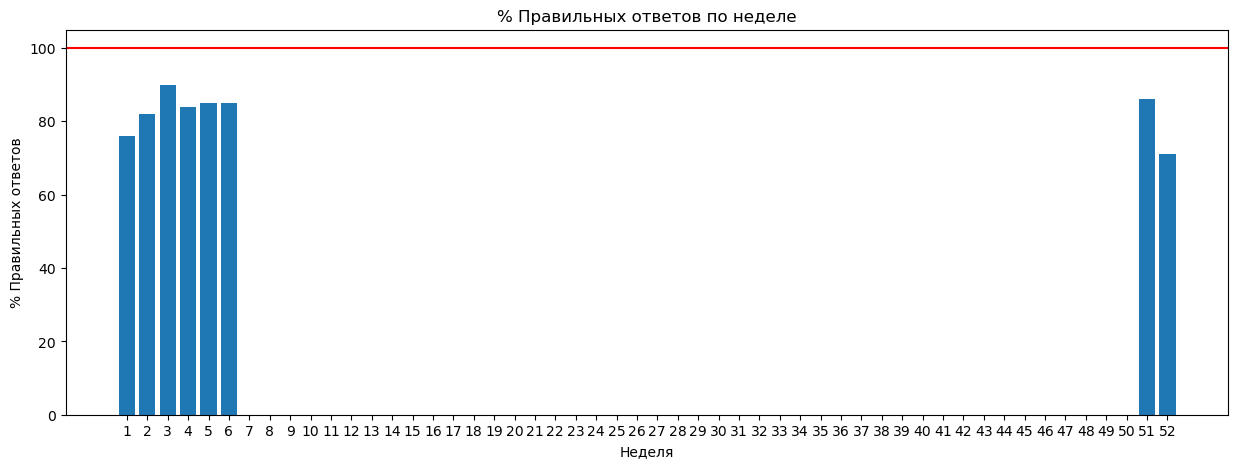

In [364]:
percent_ok('Статистика')

 # Дополнительные задания

In [365]:
counter=10

In [366]:
a=[2,3,3,8,4,1]
b=[30,15,16,2,90,100]

df3=pd.DataFrame({'Имя':['Нина','Света','Оля','Рома'],'Возраст':[32,10,37,32]})
df4=pd.DataFrame({'Name':['Нина','Света','Олег','Рома'],'Рост':[165,140,170,150]})
price=pd.DataFrame({'Старое значение':[300,60,12,4,29,5],'Новое значение':[390,60,10,6,33,6]})

add_tasks={'Можно ли менять значения в словаре?':'Значения можно поменять, например df[2]=["тут что-то новое"], а ключ напрямую не меняется, только через удаление и новое присваивание',
          'Что может быть ключом в словаре':'Ключами в словаре Python могут быть только неизменяемые типы данных. 1 Например, строки, числа (целые и дробные), кортежи.',
          'Что такое Break, Continue и Pass в Python?':'Break: Оператор break в Python используется для преждевременного завершения цикла, независимо от состояния цикла. Когда Python обнаруживает оператор break, он немедленно завершает цикл и переходит к следующей строке кода вне цикла.\
                                                        Continue: Оператор continue в Python используется для пропуска оставшейся части кода внутри цикла только для текущей итерации. Цикл не завершается, а переходит к следующей итерации.\
                                                        Pass: Оператор pass в Python является нулевой операцией; при его выполнении ничего не происходит. Используется в качестве заполнителя в блоке, где Python ожидает выражение.',
          'Какое действие выполняет % и знак //':'// используется для выполнения целочисленного деления. % показывает остаток от деления',
           "Локальные и глобальные переменные":'Локальные переменные объявляются внутри функции и доступны только в этой функции. Глобальные переменные объявляются вне функций и доступны из любой части кода. Чтобы изменить глобальную переменную внутри функции, используется ключевое слово global (пример: def mul(): global c c= c* 10 print(c)).',
           'Что выведет такой код a=[1,2,3] b=a b.append(4) print(a)':'1,2,3,4',
           'Из списка numbers сделать кортеж':'numbers2=tuple(numbers)',
           'Вывести уникальные значения numbers':'set(numbers) или можно через цикл',
           'while(True): print(1) что выведет?':'Бесконечные единицу',
           'Что выведет такой код? def f(): x=15 print(x) x=12 f()':'15',
           'Перевернуть список a':'a.reverse() или a[::-1]',
           'Проверить состоит ли строка только из текста':"('Тут текст или переменная').isalpha()",
           'Для пиццы площадью 10 см нужно 0.5 кг сыра, сколько надо сыра на пиццу 20 см':'Ответ 2 кг. s1=3.14*10**2 s2=3.14*20**2 s2/s1*0.5',
           'Изменяемые и неизменяемые типы данных в Python ':'Изменяемые Списки (list),Словари (dict),Множества (set). Неизменяемые типы данных в Python:Числа (int, float, complex),Строки (str),Кортежи (tuple),Файлы (file),Boolean (bool)',
           'Что выведет такой код c=[1,4,2] a=[c]*3 c[0]=0  print(a)':'[[0, 4, 2], [0, 4, 2], [0, 4, 2]]',
          
           'С помощью .slice оставить в ШК места только цифры':"data['ШК места']=data['ШК места'].str.slice(8,len(data['ШК места'][0]))",
           'Есть ли корреляция между номером заказа и весом?':"Ответ НЕТ,data['Номер заказа'].corr(data['Вес к оплате, кг'])",
           'Отразить 10 чисел от 1 до 5 в рандомном порядке':'for i in range(10):print(random.randrange(1,6)) или for i in range(10): print(random.choice(range(1,6)))',
           'Создать датафрейм из нормально распределенных чисел и дать сразу названия колонкам':"rdata=pd.DataFrame(np.random.randn(10,5), columns=['a1','a2','a3','a4','a5'])",
           'С помощью apply и lambda добавить в data колонку Вес2, где, если вес меньше 1 кг отразить 1 ':"data['Вес2']=data['Вес к оплате, кг'].apply(lambda x: 1 if x<1 else x)",
           'Отразить названия колонок data':'data.columns',
           "Объединить с помощью merge таблицы df3,df4, чтобы остались все значения из df3":"pd.merge(df3,df4, left_on='Имя', right_on='Name', how='left') df3.merge(df4, left_on='Имя', right_on='Name', how='left')",
            "Объединить с помощью merge таблицы df3,df4, типом inner ":"pd.merge(df3,df4, left_on='Имя', right_on='Name') df3.merge(df4, left_on='Имя', right_on='Name')",
            'Объединить df, df2 друг на друга':'pd.concat([df, df2])',
            'Объдинить df3 и df4 с помощью join (join используется для объединения по индексам)':'df3.join(df4)',
           'Посчитать на сколько процентов price изменилась цена':"(d1['Новое значение']/d1['Старое значение'])*100-100 или (d1['Новое значение']-d1['Старое значение'])/d1['Старое значение']*100",
           'ильина наталья сократить до инициалов И.Н.':"'ильина наталья'.split()[0][0].upper()+'.'+'ильина наталья'.split()[1][0].upper()+'.'",
           'Excel проссумировать все значения в столбце B':'=СУММ(B:B)',
           'Excel Найти произведение B2 и B4 ':'=ПРОИЗВЕД(B2;B4)',
           'Excel если В7 больше 10, то вывести Больше 10':'=ЕСЛИ(B7>10;"Больше 10")',
           'Excel Найти среднее значение в диапазоне между B1 и B6 ':'=СРЗНАЧ(B1:B6)',
           'Excel найти масимальное и минимальное значение в столбце С':'=МИН(C:C),=МАКС(C:C)',
           'Excel функция ВПР найти для значения A2 соотвествующее значение из втророй колонки таблицы G:H':'=ВПР(A2;G:H;2;0)',
           'Excel Найти с помощию функции ИНДЕКС из таблицы A14:B18 значение из 4 строки и вторго столбца ':'=ИНДЕКС(A14:B18;4;2)',
           'Excel просуммировать ячейки из столбца В, если ей соответствует в столбце A слово масло':'=СУММЕСЛИ(A:A;"масло";B:B)',
           'Excel просуммировать ячейки из столбца В, если ей соответствует в столбце A слово масло и значение в столбце B больше 10':'=СУММЕСЛИМН(B:B;A:A;"масло";B:B;">10")',
           'Excel посчитать количество значений в столбце B и посчитать количество значений в столбце B,которые больше 50':'=СЧЁТ(B:B), =СЧЁТЕСЛИ(B:B;">50")',
           'ClickHouse столбцовая СУБД. Плюсы и недостатки столбцовых СУБД':'Столбцовая СУБД быстрее обрабатывает данные, МИНУСЫ медленнее записываются новые данные. А отредактировать то, что уже записано в базу, практически невозможно',
           'ClickHouse особенности типизация колонок':' ClickHouse — жёсткая типизация всех колонок. Например, в одно поле должны входить числа одинаковой длины, чтобы не тратить память на хранение количества байт',
           'Движки в ClickHouse':'Движки (англ. engines) — это типы таблиц, которые определяют, как и где хранятся данные в таблице, какие запросы поддерживает таблица и т. д. Движков в ClickHouse несколько, но самые универсальные — из семейства MergeTree',
           'Сэмплирование в ClickHouse':'С помощью сэмплирования рассчитывают не на всех данных, а на выборке. Например взять 10% данных для расчёта: SELECT genre,COUNT(*)*10 AS FROM games_data.games SAMPLE 0.1 GROUP BY genre',
           'Особенности использования псевдономов в ClickHouse':' Создатели ClickHouse расширили возможности псевдонимов: их можно применять сразу же после объявления',
           'Специфические функции ClickHouse':'SELECT sumCount(sales) , SELECT uniq(Genre),uniqExact(Genre)- уникальные элементы uniqExact - точное количество, uniq приблизительное; varPop(NA_sales) - дисперсия,stddevPop(NA_sales)-стандартное отклонение,\
                                            SELECT corr(NA_sales, Critic_Score) коэффициент корреляции Пирсона',
           'ClickHouse написать функции, которые возвращиют массивы — topK и quantiles':'SELECT topK(3)(Genre) - возвращает три самых популярных жанра, SELECT quantiles(0.25, 0.5, 0.75)(NA_sales) возвращает квантили',
           'Пример функции комбинаторов в ClickHouse':"sumIf(NA_sales, Genre = 'Action'),topKIf(3)(Genre, Year_of_Release = '2015'),SELECT countDistinctIf(Name, Genre = 'Misc')",
           'Excel ВПР и ГПР':'Вертикальный и горизонтальный поиск примеры =ВПР(A2;G:H;2;0), =ГПР(A18;$D$1:$G$2;2;0)',
           'Примеры вложенных функций EXCEL':'=СУММ(СРЗНАЧ(C2:C10);СРЗНАЧ(D2:D10)) и =ЕСЛИ(C2>15;"больше 15";ЕСЛИ(C2>10;"больше 10";"меньше 10"))',
           'Power Query в EXCEL ':'Power Query — это бесплатная надстройка Excel. Она преобразовывает данные различных форматов, объединяет их в один отчёт и автоматически их обновляет, чтобы информация всегда была актуальной. В отличии от обычного Excel может обрабатывать более 1 048 576 строк',
           'СУБД Vertica':'Vertica — колоночная СУБД для решения аналитических задач на больших данных в реальном времени. Некоторые особенности:\
                                    Многопоточная загрузка данных позволяет производить анализ в реальном времени. \
                                    Колоночная структура хранения позволяет повышать скорость анализа больших данных более чем в 100 раз. \
                                    Высокая степень сжатия позволяет снижать затраты на хранение данных и экономит до 90% дискового пространства.\
                                    Многоуровневая защита от сбоев обеспечивается путём репликации данных, резервного копирования и восстановления.\
                                    Масштабируемость даёт неограниченные возможности увеличения производительности при работе с данными большого объёма.\
                                    Vertica обеспечивает широкие возможности SQL-анализа и включает обширный спектр встроенных аналитических функций, в том числе геолокационный анализ, временные ряды, выявление шаблонов и пр.. ',
           'Добавить в data длину строки колонки описание вложение и сделать сортировку по убыванию длины строки':"data['Длина строки']=list(map(lambda x: len(x),data['Описание вложения']))  data.sort_values('Длина строки',ascending=False)",
           'Посчитать с помощью .cumsum() в data сумму с накоплением':"data['Вес к оплате, кг'].cumsum()"
          
           

           
           
           
          }


### Задача

In [403]:
task=random.choice(list(add_tasks))
task

'Объединить df, df2 друг на друга'

### Моё решение

In [405]:
pd.concat([df,df2])

,Name,Age
0,Natasha,32
1,Каte,10
2,Olya,37
3,Max,32
5,собака,4
0,Нина,12
1,Света,1
2,Олег,3
3,Рома,73


### Проверить решение

In [406]:
add_tasks[task]

'pd.concat([df, df2])'

In [407]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'Дополнительные задания',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [408]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

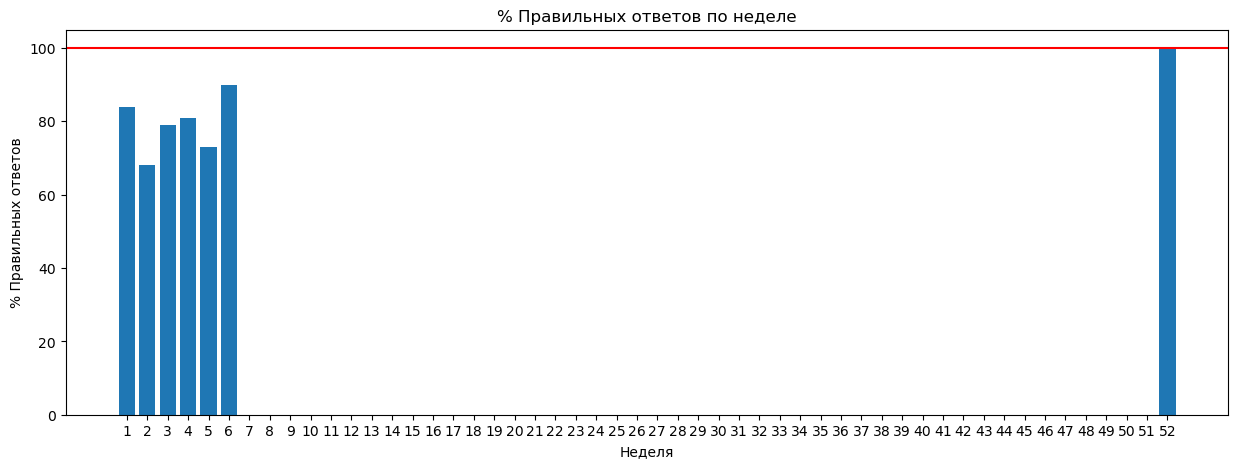

In [409]:
percent_ok('Дополнительные задания')

# A/B -тест

In [410]:
counter=5

In [411]:
scooters = pd.Series([15, 31, 10, 21, 21, 32, 30, 25, 21,28, 25, 32, 38, 18, 33, 24, 26, 40, 24, 37, 20, 36, 28, 38,
24, 35, 33, 21, 29, 26, 13, 25, 34, 38, 23, 37, 31, 28, 32,24, 25, 13, 38, 34, 48, 19, 20, 22, 38, 28, 31, 18, 21, 24,
31, 21, 28, 29, 33, 40, 26, 33, 33,  6, 27, 24, 17, 28,  7,33, 25, 25, 29, 19, 30, 29, 22, 15, 28, 36, 25, 36, 25, 29,
33, 19, 32, 32, 28, 26, 18, 48, 15, 27, 27, 27,  0, 28, 39,27, 25, 39, 28, 22, 33, 30, 35, 19, 20, 18, 31, 44, 20, 18,
17, 28, 17, 44, 40, 33])

screens = pd.Series([4, 2, 4, 5, 5, 4, 2, 3, 3, 5, 2, 5, 2, 2, 2, 3, 3, 4, 8, 3, 4, 3, 5, 5, 4, 2, 5, 2, 3, 7, 5, 5, 6,  
                     5, 3, 4, 3, 6, 3, 4, 4, 3, 5, 4, 4, 8, 4, 7, 4, 5, 5, 3, 4, 6, 7, 2, 3, 6, 5, 6, 4, 4, 3, 4, 6, 4, 4, 
                     6, 2, 6, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 3, 1, 5, 4, 3, 4, 6, 3, 1, 3, 2, 7, 3, 6, 6, 6, 5, 5])

screens2 = pd.Series([40, 2, 4, 5, 5, 4, 2, 3, 3, 5, 2, 5, 2, 2, 2, 3, 3, 4, 8, 3, 4, 3, 5, 5, 4, 2, 5, 2, 3, 7, 5, 5, 6,  
                     5, 3, 4, 3, 6, 3, 4, 4, 30, 5, 4, 4, 8, 4, 7, 4, 5, 5, 3, 4, 6, 7, 2, 3, 6, 5, 6, 4, 4, 3, 4, 6, 4, 4, 
                     6, 2, 6, 5, 3, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 3, 1, 5, 4, 3, 4, 6, 3, 1, 3, 2, 7, 3, 6, 6, 6, 5, 50])
sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015, 
            2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785, 
            3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686, 
            1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007, 
            509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066, 
            3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255, 
            1740, 2596]
before = [157, 114, 152, 355, 155, 513, 299, 268, 164, 320, 
          192, 262, 506, 240, 364, 179, 246, 427, 187, 431, 
          320, 193, 313, 347, 312, 92, 177, 225, 242, 312]

after = [282, 220, 162, 226, 296, 479, 248, 322, 298, 418, 
         552, 246, 251, 404, 368, 484, 358, 264, 359, 410, 
         382, 350, 406, 416, 438, 364, 283, 314, 420, 218]



In [412]:

abtest={'A/B тест это':'A/B-тестирование (от англ. split testing — «раздельное тестирование») — метод маркетингового исследования, позволяющий на основе статистики оценить влияние изменения на метрики продукта. 14В ходе теста сравнивается контрольный (A) вариант продукта с его изменённой (B) версией. Цель — определить лучший из двух протестированных вариантов. В результате эксперимента выбирают тот вариант, который значимо улучшает один или несколько целевых показателей.',
       'A/A тест - это':'A/A-тесты — это такие эксперименты, в которых сопоставляемые версии страницы или кампании идентичны между собой. Проведение таких тестов выявляет отклонения и технические проблемы, связанные с платформой. Работа над ними, в свою очередь, снижает вероятность ошибок в результатах A/B-тестов.',
        'уровень статистической значимости α альфа':'уровень статистической значимости — это вероятность случайно получить в реальном наблюдении значение, далёкое от предполагаемого в нулевой гипотезе, уровень статистической значимости — это одновременно и вероятность ошибиться: отвергнуть нулевую гипотезу, потому что наблюдение отличается от предполагаемого значения слишком сильно. ',
        'Ошибка первого и второго рода':'Оши́бка пе́рвого ро́да (𝛼-ошибка, ложноположительное заключение) — ситуация, когда отвергнута верная нулевая гипотеза (об отсутствии связи между явлениями или искомого эффекта).Оши́бка второ́го ро́да (β-ошибка, ложноотрицательное заключение) — ситуация, когда принята неверная нулевая гипотеза.',
        'Расчёт групповой вероятности ошибки первого рода для 2-х и 3-х тестов, или FWER (от англ. family-wise error rate, «групповой коэффициент ошибок»)':'1−(1−α)**2 для друх тестов, 1−(1−α)**3 для трех тестов',
        'Поправка Бонферрони — это':'Поправка Бонферрони — это метод противодействия проблеме множественных сравнений в статистике. Он позволяет снизить вероятность ложноположительного результата эксперимента. Суть метода в том, что каждую отдельную гипотезу проверяют на уровне значимости, который рассчитывается как желаемый общий альфа-уровень, делённый на количество гипотез. Например, если проверяется 20 гипотез с желаемым альфа-уровнем 0,05, то поправка Бонферрони будет проверять каждую отдельную гипотезу при альфа-уровне 0,05/20 = 0,0025',
        'Нулевая и альтернативная гипотеза':'Нулевая гипотеза (H0) – утверждение о параметре генеральной совокупности (параметрахгенеральных совокупностей) или распределении, которое необходимо проверить. Альтернативная гипотеза (HA) – утверждение, противоположное нулевой гипотезе. Выдвигается, но не проверяется.Все гипотезы можно разделить на двусторонние (ненаправленные) \
         и односторонние (направленные).Например, нулевая гипотеза - в день в среднем поступает 50 звонков. Альтернативна двустороняя - в день не поступает в среднем 50 звонков. Альтернативная левостороняя - в день в среднем меньше 50 звонков, Альтернативная правостороняя - в день в среднем больше 50 звонков ',
       
        'В каком случае отвергается нулевая гипотеза':'Нулевая гипотеза отвергается в пользу альтернативной, если наблюдаемое на выборке значение оказывается слишком далеко от предполагаемого в нулевой гипотезе.',
        'p-value это':'— вероятности при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе',
        'Если p-value меньше выбранного уровня статистической значимости, то':'Если p-value меньше выбранного уровня статистической значимости, то нулевая гипотеза отвергается в пользу альтернативной',
        'Если p-value больше выбранного уровня статистической значимости, то':'Если p-value больше выбранного уровня статистической значимости, то нулевая гипотеза не отвергается в пользу альтернативной',
        'Провести T-test для выборки scooters, нулевая гипотеза, что в среднем 30 самокатов на станции':"p-значение: 0.00033528259973700724 Отвергаем нулевую гипотезу from scipy import stats as st optimal_value = 30 alpha = 0.0 results = st.ttest_1samp(scooters, optimal_value) print('p-значение:', results.pvalue)if results.pvalue < alpha:print('Отвергаем нулевую гипотезу')else:print('Не получилось отвергнуть нулевую гипотезу')",
        'Проверить гипотезу, что среднее количество просмотров screens менее 5':"p-value 2,9 отвергаем нулевую гипотезу pred=5 alpha=0.05 results=st.ttest_1samp(screens,pred,alternative='less') results.pvalue print(results.pvalue) if results.pvalue<alpha: print('Отвергаем нулевую гипотезу') else: print('Не получилось отвергнуть нулевую гипотезу')",
        'Проверить гипотезу, что среднее количество просмотров screens больше  5':"p-value 0,99 не отвергаем нулевую гипотезу pred=5 alpha=0.05 results=st.ttest_1samp(screens,pred,alternative='greater') results.pvalue print(results.pvalue) if results.pvalue<alpha: print('Отвергаем нулевую гипотезу') else: print('Не получилось отвергнуть нулевую гипотезу')",
        'При каких условиях можно использовать t-test для сравнения двух совокупностей?':'Генеральные совокупности не зависят друг от друга, Выборочные средние нормально распределены,Дисперсии рассматриваемых генеральных совокупностей равны',
        'Метод для проверки двусторонней гипотезы (сравниваем одну выборку с числом)':"st.ttest_1samp(screens,estimated number)",
        'Метод для проверки левосторонней гипотезы(сравниваем одну выборку с числом)':"st.ttest_1samp(screens,estimated number,alternative='less')",
        'Метод для проверки правосторонней гипотезы(сравниваем одну выборку с числом)':"st.ttest_1samp(screens,estimated number,alternative='greater')",
        'Провести t-test на проверку равенства scooters и screens ':"alpha = 0.05 results=st.ttest_ind(scooters, screens) print('p-значение:', results.pvalue)if (results.pvalue < alpha): print('Отвергаем нулевую гипотезу')else:print('Не отвергаем нулевую гипотезу')" ,
        'Метод для проверки равенства двух совокупностей':'st.ttest_ind(sample_1, sample_2)',
        'Провести t-test на проверку, что scooters больше screens':"alpha = 0.05 results=st.ttest_ind(scooters, screens, alternative='greater') print('p-значение:', results.pvalue)if (results.pvalue < alpha): print('Отвергаем нулевую гипотезу')else:print('Не отвергаем нулевую гипотезу')",
        'Провести t-test на проверку, что scooters меньше screens':"alpha = 0.05 results=st.ttest_ind(scooters, screens, alternative='less') print('p-значение:', results.pvalue)if (results.pvalue < alpha): print('Отвергаем нулевую гипотезу')else:print('Не отвергаем нулевую гипотезу')",
        'Тест о  равенстве среднего значения генеральной совокупности до и после изменений':'st.ttest_rel(before, after)',
        'Метод Шидака':'Метод Шидака  обеспечивает FWER≤α Скорректированное значение требуемого уровня значимости рассчитывается по формуле: α=1-(1-α)в степени 1/кол-во тестов',
        'Метод Холма':'Еще один метод, позволяющий провести коррекцию уровня значимости. В отличие от методов Шидака и Бонферрони, метод Холма — итерационный. То есть рассчитывается не единый уровень α  для всех тестов, а новый для каждого из тестов.',
        'χ² (хи-квадрат)- это': 'χ² (хи-квадрат) (Пирсона) Используют для того, чтобы  проверять гипотезу о том, что выборка взята из нормально распределённой генеральной совокупности. Рассчитывается как сумма  квадратов разниц между наблюдаемыми и ожидаемыми значениями делят на их ожидаемые значения.',
        'Критерий Шапиро-Уилка — это':'Критерий Шапиро-Уилка — это статистический тест, который позволяет определить, соответствуют ли данные нормальному распределению. stats.shapiro(sample_1)',
        'Тест Уилкоксона-Манна-Уитни':'Тест Уилкоксона-Манна-Уитни (U-критерий Манна-Уитни) — непараметрический статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.Ключевая идея — проранжировать две выборки по порядку от меньшего к большему и сравнить ранги одних и тех же значений, попавших в обе выборки',
         'MDE в AB тесте':'MDE  минимальное изменение показателя, которое хотим зафиксировать (Minimum Detectable Effect). Например, в среднем значение показателя — 20%. Мы ожидаем, что в тестируемом варианте показатель вырастет до 25%. Тогда MDE в абсолютном выражении — 5%. Чем ниже показатель MDE, тем больше должна быть выборка, тем больше будет длительность теста.',
        'Методы приоритизации гипотез ICE, RICE':'ICE impact (влияние)*confidence(уверенность)/effort(усилия) и RICE=reach(охват)*impact (влияние)*confidence(уверенность)/effort(усилия)',
        'Как посчитать размера выборки и длительности теста':'Легче всего через специализированные сайты, где выводятся результаты на основании коэффициента конверсии, MDE Минимальный Обнаруживаемый Эффект, Статистической мощности, уровня значимости) ',
        'Мощность статистического теста':'Мощность статистического теста — это вероятность правильно отвергнуть нулевую гипотезу, когда альтернативная гипотеза верна, т.е. вероятность не совершить ошибку второго рода. Если обозначить вероятность ошибки второго рода как β, то параметр 1 - β будет называться мощностью статистического теста',
        'Основные ошибки при анализе А/B-тестов':'Некорректное деление трафика теста,Игнорирование статистической значимости,Проблема подглядывания,Слишком маленькая выборка,Слишком быстрый или слишком долгий тест, Отсутствие анализа аномалий, Пренебрежение поправками к статистической значимости при множественном сравнении ',
        'Провести t-test на проверку, что среднее screens меньше 4.867':'1.3358596895543794e-06 Отвергаем нулевую гипотезу',
        'Провести t-test на проверку равенства sample_1,sample_2':'p-значение:  0.1912450522572209 Не получилось отвергнуть нулевую гипотезу',
        'Есть два дата сета измерений одной выборки до и после изменений (порядок объектов одинаковый), Проверьте гипотезу о том, что значения не изменились':'st.ttest_rel(before, after)'
        
       }

# - Метод для проверки двусторонней гипотезы(сравниваем одну выборку с числом):"**st.ttest_1samp(data1,number)**,
- Метод для проверки левосторонней гипотезы (сравниваем одну выборку с числом':**st.ttest_1samp(data1,number,alternative='less')**,
- Метод для провекци правосторонней гипотезы (сравниваем одну выборку с числом) ':**st.ttest_1samp(data1,number,alternative='greater**)
- тест на проверку равенства двух совукупностей **st.ttest_ind(data1, data2)**
- Метод для проверки двусторонней гипотезы (сравниваем две совокупности) **st.ttest_ind(data1, data2)**
- Метод для проверки односторонней гипотезы(сравниваем две совокупности)**st.ttest_ind(data1, data2, alternative='less' или alternative='greater)**
- Тест для анализ одной и той же совокупности (до и после изменений) **st.ttest_rel(before, after) порядок объектов одинаковый**
- Метод Шапиро-Уилка проверяет нормально ли распределены данные (результат сравнивается с p_value) **st.shapiro(sample_1)**
- Тест Уилкоксона-Манна-Уитни **st.mannwhitneyu(data1, data2)**

### Задача

In [425]:
task=random.choice(list(abtest))
task

'Проверить гипотезу, что среднее количество просмотров screens менее 5'

### Моё решение

In [426]:
import scipy.stats as st

alpha = 0.05 # уровень статистической значимости

results=st.ttest_1samp(screens ,5, alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.921506706587205e-08
Отвергаем нулевую гипотезу


### Проверить решение

In [430]:
abtest[task]

"p-value 2,9 отвергаем нулевую гипотезу pred=5 alpha=0.05 results=st.ttest_1samp(screens,pred,alternative='less') results.pvalue print(results.pvalue) if results.pvalue<alpha: print('Отвергаем нулевую гипотезу') else: print('Не получилось отвергнуть нулевую гипотезу')"

In [431]:
answer= input('Получилось решить задание?')
diary.loc[len(diary)]=[date.today(),'A/B тест',task,answer,date.today().isocalendar().week]

Получилось решить задание?да


In [432]:
counter=counter-1
print(f'Осталось решить {counter}')

Осталось решить 0


### Результаты

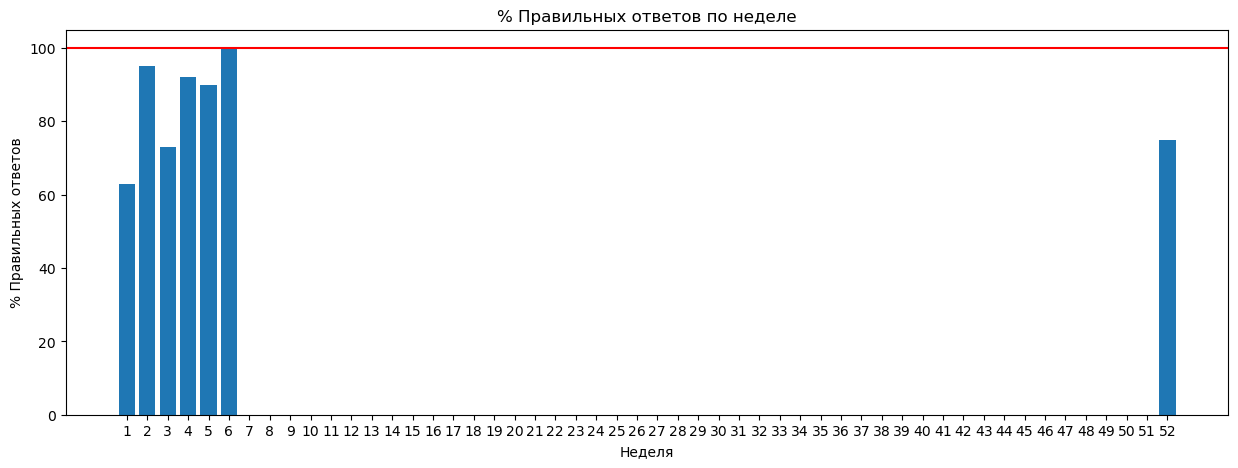

In [433]:
percent_ok('A/B тест')

# Итоговые результаты

In [434]:
diary=diary[(diary['решила?']=='да')|(diary['решила?']=='нет')]

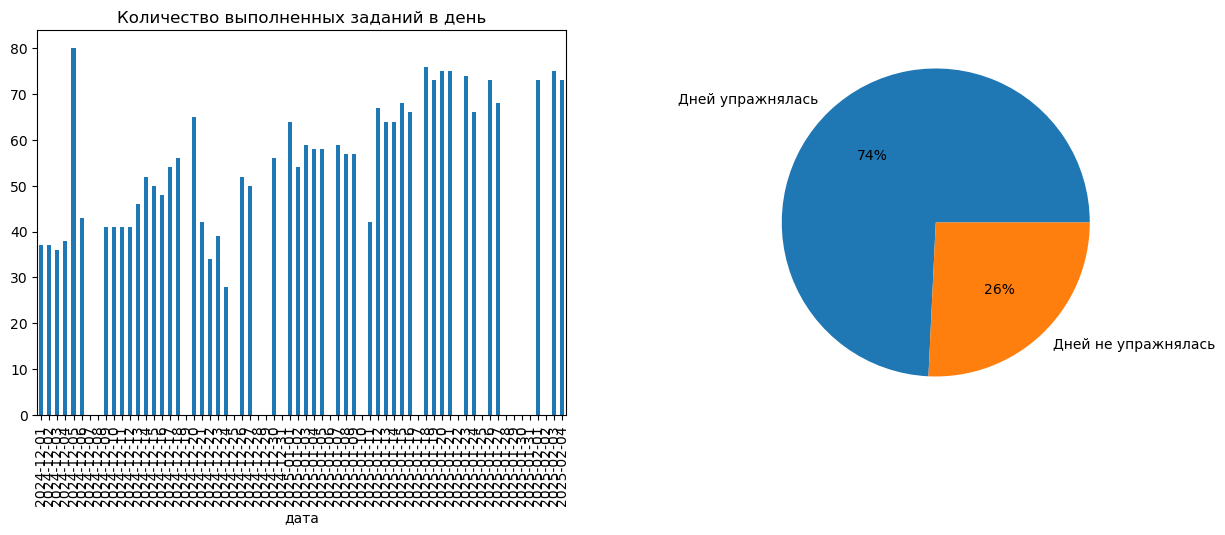

In [435]:
all_date=pd.DataFrame({'дата':[i for i in (pd.date_range(start=diary['дата'].min(), end=diary['дата'].max()).date)]})
diary2=all_date.merge(diary,how='left')
plt.subplot(1, 2,1)
diary2.groupby('дата').count()['задание'].plot.bar(figsize=(15,5))
plt.title('Количество выполненных заданий в день')
a=diary2[diary2['задание'].notnull()]['дата'].nunique()
b=diary2[diary2['задание'].isnull()]['дата'].nunique()
plt.subplot(1, 2, 2)
plt.pie(x=[a,b],labels=['Дней упражнялась','Дней не упражнялась'],autopct='%1.0f%%')
plt.show()

In [436]:
print(f"За период с {diary2['дата'].min()} до {diary2['дата'].max()} я занималась {a} дней и {b} дней не занималась")

За период с 2024-12-01 до 2025-02-04 я занималась 49 дней и 17 дней не занималась


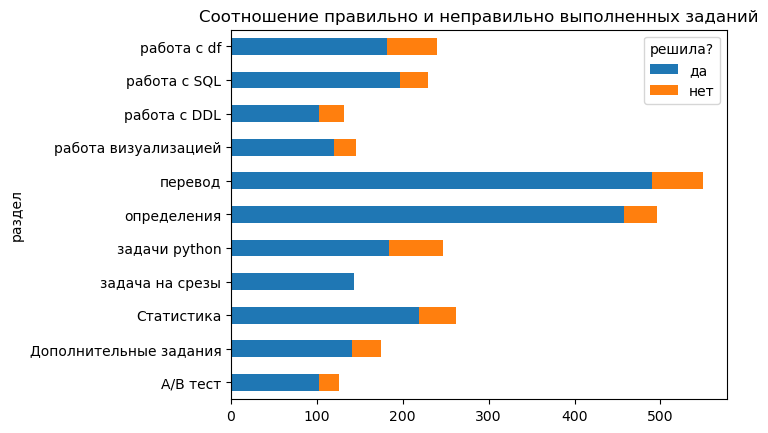

In [437]:
diary.pivot_table(index=('раздел'),columns='решила?',values='задание',aggfunc='count').plot.barh(stacked=True)
plt.title('Соотношение правильно и неправильно выполненных заданий')
plt.show()

In [438]:
time_end=time.time()

In [439]:
print('Тренировка длилась-',round((time_end-time_start)/60),'минут')

Тренировка длилась- 112 минут


# Сохраняем полученные результаты

In [440]:
diary.to_excel (r'C:/Users/Natalya/Desktop/Учёба/diary.xlsx', index= False )

# Планы

субд Vertica, библиотеки requests, sqlalchemy,  vertica-python

- Загрузить на GitHub учебные проекты

- Пройти часть курса про машинное обучение

- Пройти дополнительный часть курса про теорию верояности

- База знаний https://practicum-for-students.yonote.ru/share/7c2f4ed7-8f1c-4794-b80e-d306aa5acab7/doc/baza-znanij-karernogo-treka-data-tySZe1UYTy

- https://karpov.courses/simulator-sql

- https://stepik.org/course/76/promo

- https://www.kaggle.com/ 